In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import yfinance as yf
import requests
from bs4 import BeautifulSoup
from datetime import timedelta
import numpy as np

In [5]:
# Wczytujemy plik, pomijając pierwsze 15 wierszy
df = pd.read_csv("sp-500-pe-ratio-price-to-earnings-chart.csv", skiprows=15)

# Nadajemy nazwy kolumn
df.columns = ["date", "pe"]

# Konwersja typów
df["date"] = pd.to_datetime(df["date"])
df["pe"] = pd.to_numeric(df["pe"], errors="coerce")

# usuwamy ewnentualne NaN
df = df.dropna()

# Sortujemy chronologiczne
df = df.sort_values("date").reset_index(drop=True)

df.head()

,date,pe
0,1927-12-01,15.9099
1,1928-01-01,14.8898
2,1928-02-01,14.6271
3,1928-03-01,16.3390
4,1928-04-01,15.8000


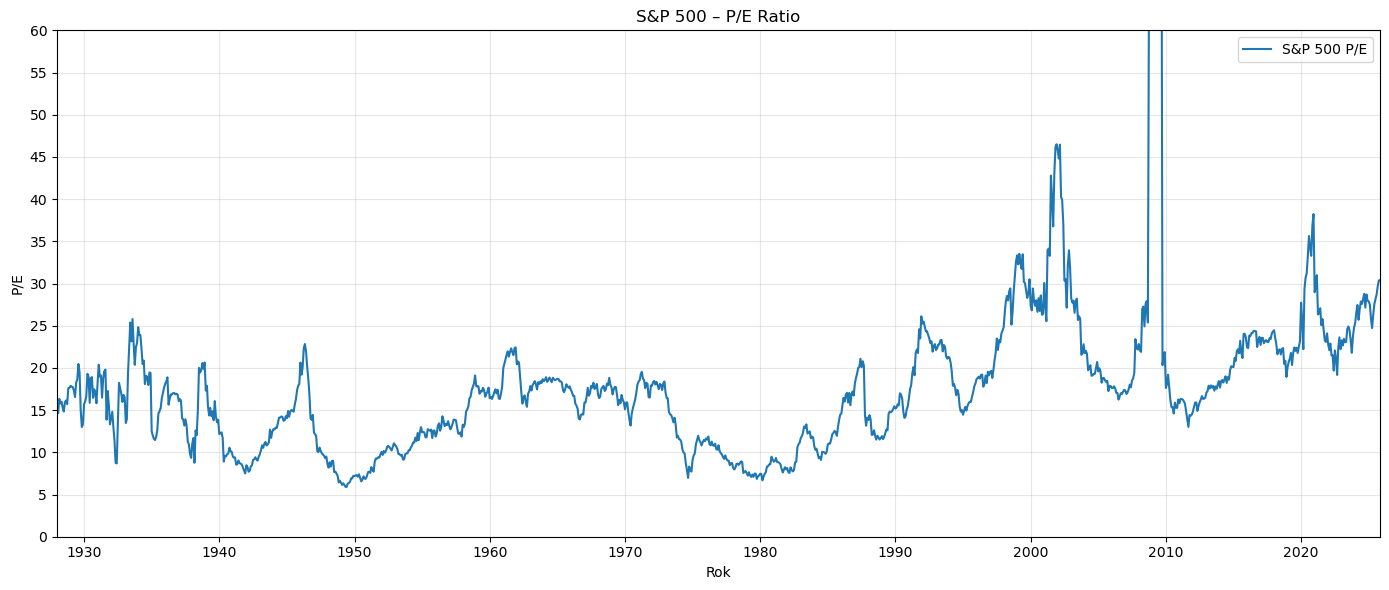

In [9]:
plt.figure(figsize=(14,6))
plt.plot(df["date"], df["pe"], label="S&P 500 P/E")

# oś Y, krok co 5, max 60
plt.ylim(0, 60)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5))

# oś X, krok co 10 lat
plt.gca().xaxis.set_major_locator(mdates.YearLocator(10))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# min x 1920
plt.xlim(pd.Timestamp("1928-01-01"), df["date"].max())


plt.title("S&P 500 – P/E Ratio")
plt.xlabel("Rok")
plt.ylabel("P/E")
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()

plt.show()

In [11]:
#dzielimy dane na okresy czasu
df_1 = df[df["date"] < "2000-01-01"].copy()
df_2 = df[(df["date"] >= "2000-01-01") & (df["date"] < "2010-01-01")].copy()
df_3 = df[(df["date"] >= "2010-01-01") & (df["date"] < "2020-01-01")].copy()
df_4 = df[df["date"] >= "2020-01-01"].copy()

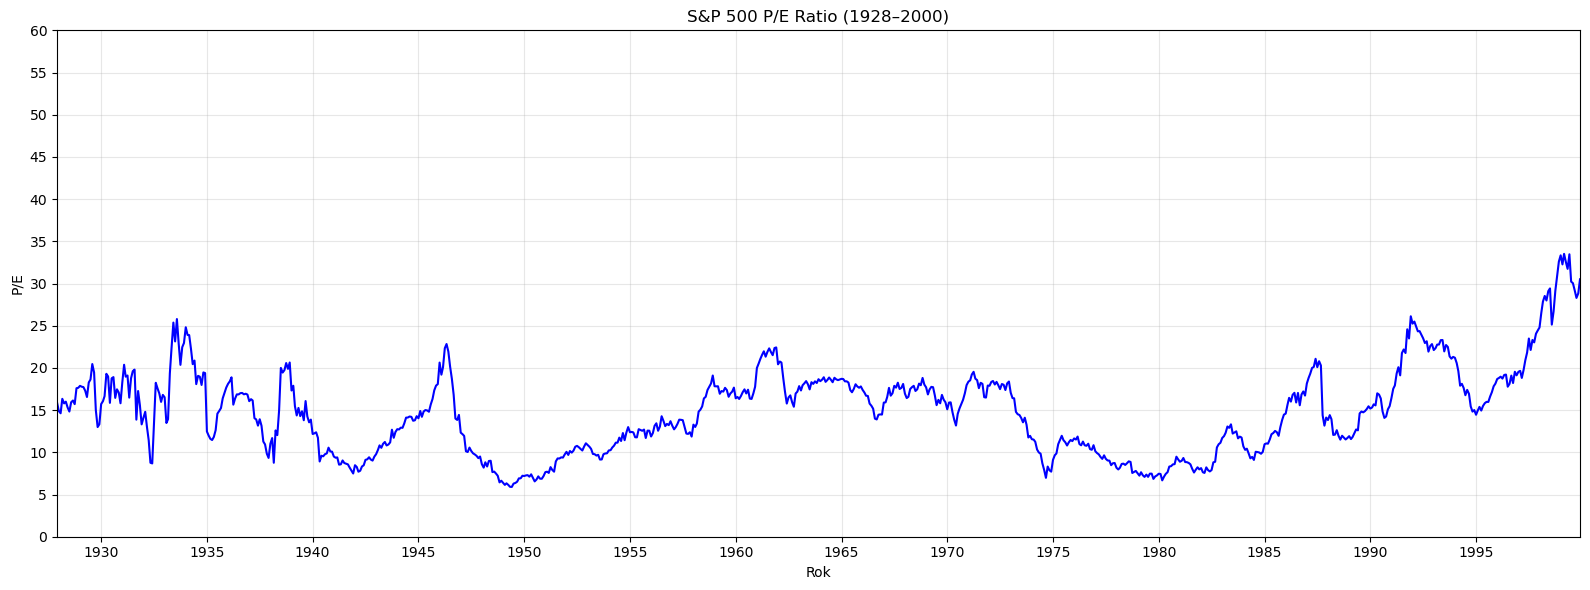

In [13]:
plt.figure(figsize=(16,6))
plt.plot(df_1["date"], df_1["pe"], linewidth=1.5, color='blue')

plt.title("S&P 500 P/E Ratio (1928–2000)")
plt.xlabel("Rok")
plt.ylabel("P/E")

plt.ylim(0, 60)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5))

plt.xlim(df_1["date"].min(), df_1["date"].max())
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))  # tick co 5 lat
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

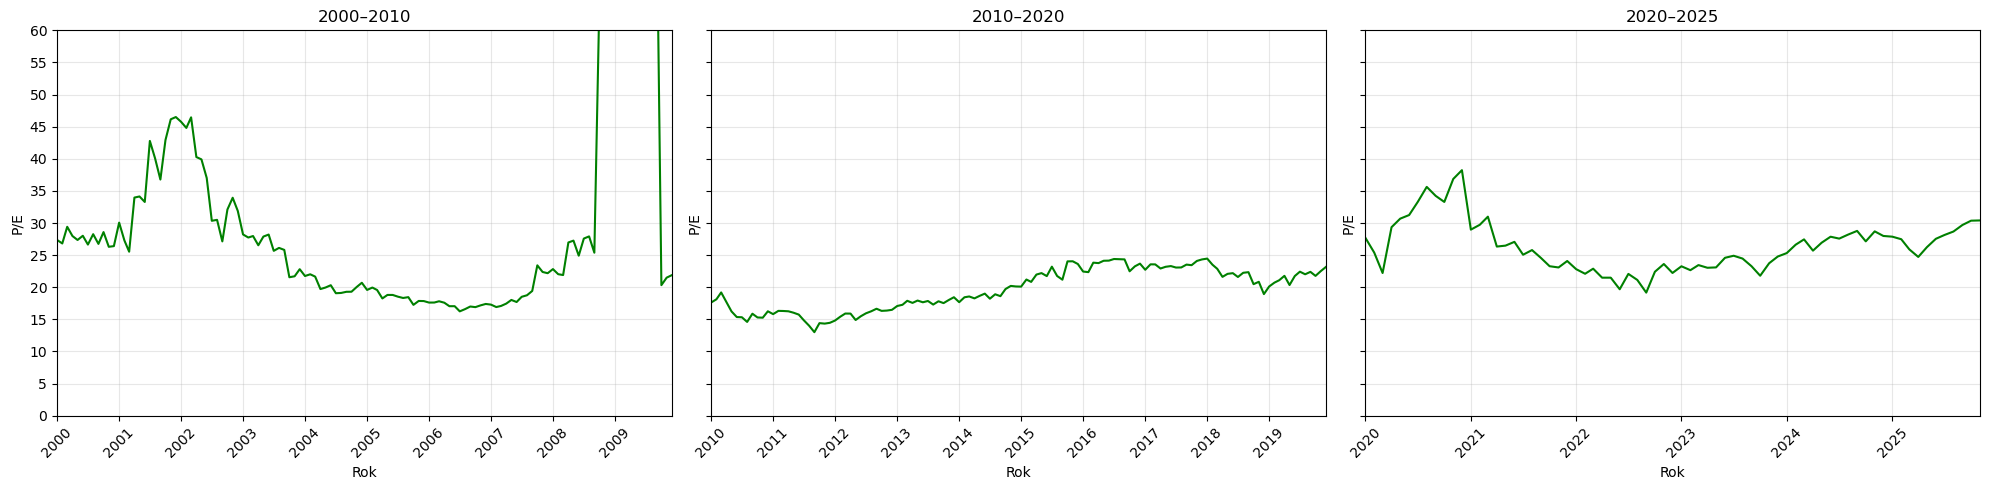

In [15]:
periods = [
    (df_2, "2000–2010"),
    (df_3, "2010–2020"),
    (df_4, "2020–2025")
]

fig, axs = plt.subplots(1, 3, figsize=(20,5), sharey=True)  # sharey=True dla wspólnej osi Y

for ax, (data, title) in zip(axs, periods):
    ax.plot(data["date"], data["pe"], linewidth=1.5, color='green')
    ax.set_title(title)
    
    # Oś Y
    ax.set_ylim(0, 60)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.set_ylabel("P/E")
    
    # Oś X
    ax.set_xlim(data["date"].min(), data["date"].max())
    ax.xaxis.set_major_locator(mdates.YearLocator(1))  # tick co rok
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    ax.set_xlabel("Rok")
    
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [17]:
# Podział okresów
periods_dict = {
    "Do 2000": df_1,
    "2000–2010": df_2,
    "2010–2020": df_3,
    "2020–2025": df_4
}

# Tworzymy tabelę statystyk
stats = pd.DataFrame(columns=["Średnia", "Mediana", "Min", "Max"])

for name, data in periods_dict.items():
    stats.loc[name] = [
        data["pe"].mean(),
        data["pe"].median(),
        data["pe"].min(),
        data["pe"].max()
    ]

print(stats)

             Średnia  Mediana      Min       Max
Do 2000    14.806338  14.8265   5.9000   33.5167
2000–2010  32.058822  25.6022  16.2487  122.4128
2010–2020  19.674211  20.1110  13.0078   24.4613
2020–2025  26.381413  25.8981  19.1662   38.2297


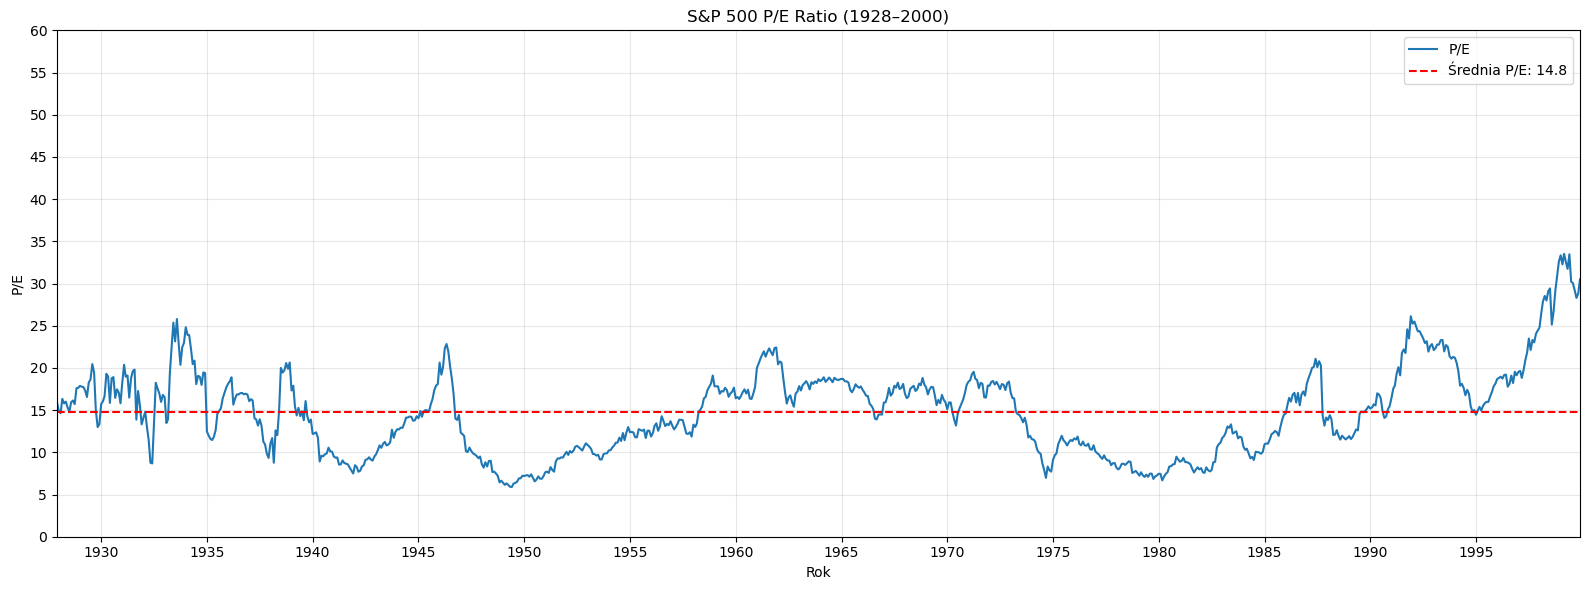

In [19]:
plt.figure(figsize=(16,6))
plt.plot(df_1["date"], df_1["pe"], linewidth=1.5, label="P/E")
mean_pe_1 = df_1["pe"].mean()
plt.axhline(mean_pe_1, color='red', linestyle='--', linewidth=1.5, label=f"Średnia P/E: {mean_pe_1:.1f}")

plt.title("S&P 500 P/E Ratio (1928–2000)")
plt.xlabel("Rok")
plt.ylabel("P/E")
plt.ylim(0, 60)
plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(5))
plt.xlim(df_1["date"].min(), df_1["date"].max())
plt.gca().xaxis.set_major_locator(mdates.YearLocator(5))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

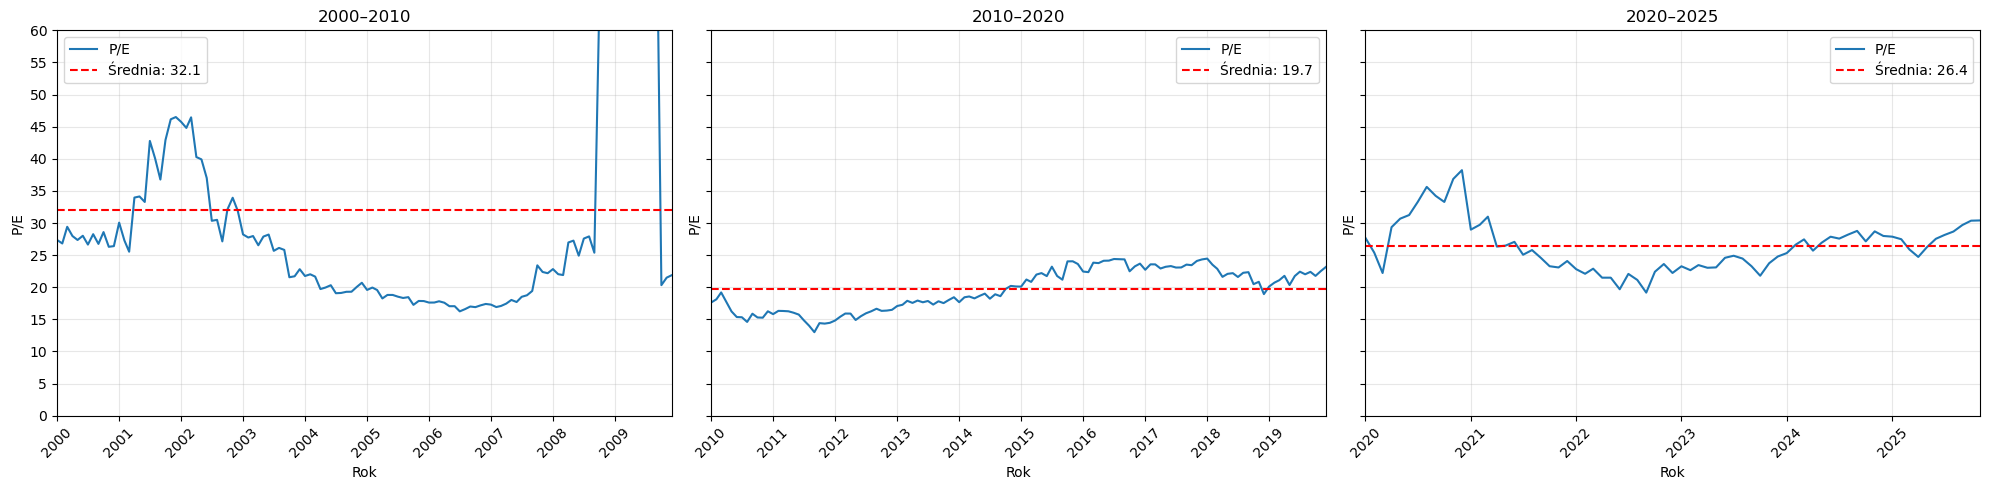

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(20,5), sharey=True)

for ax, (name, data) in zip(axs, list(periods_dict.items())[1:]):  # pomijamy Do 2000
    ax.plot(data["date"], data["pe"], linewidth=1.5, label="P/E")
    
    mean_pe = data["pe"].mean()
    ax.axhline(mean_pe, color='red', linestyle='--', linewidth=1.5, label=f"Średnia: {mean_pe:.1f}")
    
    ax.set_title(name)
    ax.set_ylim(0, 60)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.set_xlim(data["date"].min(), data["date"].max())
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    ax.set_xlabel("Rok")
    ax.set_ylabel("P/E")
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, alpha=0.3)
    ax.legend()

plt.tight_layout()
plt.show()

C:\Users\lukas\AppData\Local\Temp\ipykernel_17144\2290968836.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", start="2000-01-01", end="2025-12-01", interval="1mo")
[*********************100%***********************]  1 of 1 completed


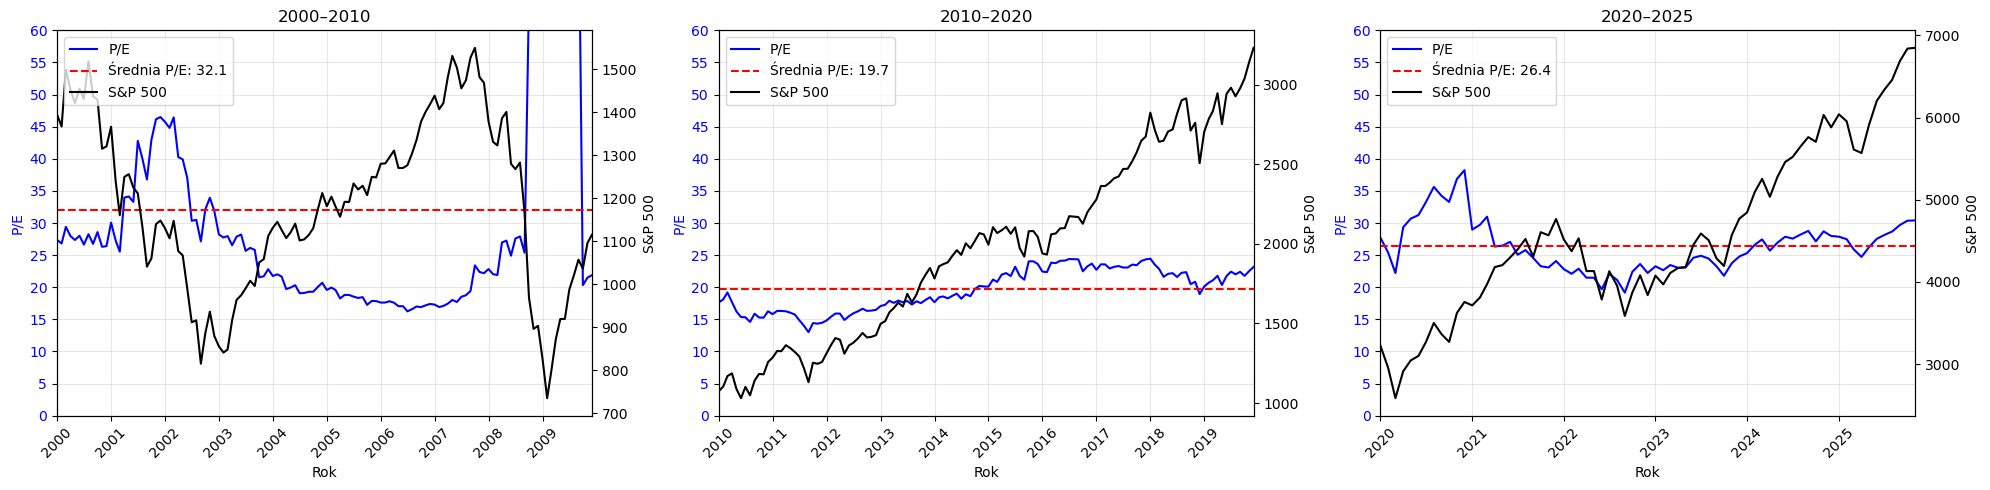

In [23]:
# Pobieramy dane S&P 500
sp500 = yf.download("^GSPC", start="2000-01-01", end="2025-12-01", interval="1mo")

# Spłaszczenie MultiIndex jeśli istnieje
if isinstance(sp500.columns, pd.MultiIndex):
    sp500.columns = [' '.join(col).strip() for col in sp500.columns.values]

# Reset index
sp500 = sp500.reset_index()

# Upewniamy się, że kolumna z cenami zamknięcia istnieje i nazywa się 'Close'
if 'Adj Close' in sp500.columns:
    sp500.rename(columns={'Adj Close':'Close'}, inplace=True)
elif 'Adj Close ^GSPC' in sp500.columns:
    sp500.rename(columns={'Adj Close ^GSPC':'Close'}, inplace=True)
elif 'Close ^GSPC' in sp500.columns:
    sp500.rename(columns={'Close ^GSPC':'Close'}, inplace=True)
# Teraz kolumna 'Close' zawsze istnieje

sp500['Date'] = pd.to_datetime(sp500['Date'])

# Wykres 3 subplotów dla okresów po 2000
fig, axs = plt.subplots(1, 3, figsize=(20,5), sharey=False)

for ax, (name, data) in zip(axs, list(periods_dict.items())[1:]):
    # P/E
    ax.plot(data["date"], data["pe"], linewidth=1.5, color='blue', label="P/E")
    
    # Linia średniej P/E
    mean_pe = data["pe"].mean()
    ax.axhline(mean_pe, color='red', linestyle='--', linewidth=1.5, label=f"Średnia P/E: {mean_pe:.1f}")
    
    # Ustawienia osi X i Y
    ax.set_title(name)
    ax.set_ylim(0, 60)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.set_xlim(data["date"].min(), data["date"].max())
    ax.xaxis.set_major_locator(mdates.YearLocator(1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
    ax.set_xlabel("Rok")
    ax.set_ylabel("P/E", color='blue')
    ax.tick_params(axis='x', rotation=45)
    ax.tick_params(axis='y', labelcolor='blue')
    ax.grid(True, alpha=0.3)
    
    # Druga oś Y dla S&P 500
    ax2 = ax.twinx()
    sp500_period = sp500[(sp500['Date'] >= data["date"].min()) & (sp500['Date'] <= data["date"].max())]
    ax2.plot(sp500_period['Date'], sp500_period['Close'], color='black', label="S&P 500")
    ax2.set_ylabel("S&P 500", color='black')
    ax2.tick_params(axis='y', labelcolor='black')
    
    # Legenda dla obu osi
    lines_1, labels_1 = ax.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.tight_layout()
plt.show()

In [25]:
# Pobranie danych
sp500 = yf.download("^GSPC", start="1927-10-31", end="2025-11-01", progress=True)

C:\Users\lukas\AppData\Local\Temp\ipykernel_17144\3365151124.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  sp500 = yf.download("^GSPC", start="1927-10-31", end="2025-11-01", progress=True)
[*********************100%***********************]  1 of 1 completed


In [29]:
# Spłaszczenie MultiIndex (jeśli istnieje)
if isinstance(sp500.columns, pd.MultiIndex):
    sp500.columns = [' '.join(col).strip() for col in sp500.columns.values]

# Reset index, żeby 'Date' była kolumną
sp500 = sp500.reset_index()

# Zmiana nazwy kolumny Close
if 'Close ^GSPC' in sp500.columns:
    sp500.rename(columns={'Close ^GSPC':'Close'}, inplace=True)
elif 'Adj Close ^GSPC' in sp500.columns:
    sp500.rename(columns={'Adj Close ^GSPC':'Close'}, inplace=True)

# Konwersja dat
df['date'] = pd.to_datetime(df['date'])
sp500['Date'] = pd.to_datetime(sp500['Date'])

# Sortowanie wymagane dla merge_asof
df = df.sort_values('date')
sp500 = sp500.sort_values('Date')

# Merge asof
df_merged = pd.merge_asof(df, sp500[['Date','Close']], left_on='date', right_on='Date', direction='backward')

# Usunięcie kolumny Date po merge
df_merged = df_merged.drop(columns=['Date'])

df_merged.head()

,date,pe,Close
0,1927-12-01,15.9099,NaN
1,1928-01-01,14.8898,17.660000
2,1928-02-01,14.6271,17.530001
3,1928-03-01,16.3390,17.299999
4,1928-04-01,15.8000,19.280001


In [31]:
# Usuwamy wiersze, w których Close jest NaN
df_merged = df_merged.dropna(subset=['Close'])

In [35]:
# Zakładamy, że df_merged jest posortowany po dacie
df_merged = df_merged.sort_values('date').reset_index(drop=True)

# 1 miesiąc → przesunięcie o 1 wiersz
df_merged['sp500_after_1M'] = df_merged['Close'].shift(-1)

# 3 miesiące → przesunięcie o 3 wiersze
df_merged['sp500_after_3M'] = df_merged['Close'].shift(-3)

# 1 rok → przesunięcie o 12 wierszy
df_merged['sp500_after_1Y'] = df_merged['Close'].shift(-12)

# 5 lat → przesunięcie o 60 wierszy
df_merged['sp500_after_5Y'] = df_merged['Close'].shift(-60)

# 10 lat → przesunięcie o 120 wierszy
df_merged['sp500_after_10Y'] = df_merged['Close'].shift(-120)

# Sprawdzenie wyników
df_merged.head()

,date,pe,Close,sp500_after_1M,sp500_after_3M,sp500_after_1Y,sp500_after_5Y,sp500_after_10Y
0,1928-01-01,14.8898,17.660000,17.530001,19.280001,24.350000,6.92,10.55
1,1928-02-01,14.6271,17.530001,17.299999,19.780001,25.840000,6.67,10.89
2,1928-03-01,16.3390,17.299999,19.280001,20.070000,25.830000,5.77,11.46
3,1928-04-01,15.8000,19.280001,19.780001,19.139999,24.879999,5.85,8.91
4,1928-05-01,16.0000,19.780001,20.070000,19.420000,25.990000,8.43,9.78


In [37]:
#dodajemy ujęcie procentowe
# 1M
df_merged['pct_change_1M'] = (df_merged['sp500_after_1M'] - df_merged['Close']) / df_merged['Close'] * 100
# 3M
df_merged['pct_change_3M'] = (df_merged['sp500_after_3M'] - df_merged['Close']) / df_merged['Close'] * 100
# 1Y
df_merged['pct_change_1Y'] = (df_merged['sp500_after_1Y'] - df_merged['Close']) / df_merged['Close'] * 100
# 5Y
df_merged['pct_change_5Y'] = (df_merged['sp500_after_5Y'] - df_merged['Close']) / df_merged['Close'] * 100
# 10Y
df_merged['pct_change_10Y'] = (df_merged['sp500_after_10Y'] - df_merged['Close']) / df_merged['Close'] * 100

# Sprawdzenie wyników
df_merged.head()

,date,pe,Close,sp500_after_1M,sp500_after_3M,sp500_after_1Y,sp500_after_5Y,sp500_after_10Y,pct_change_1M,pct_change_3M,pct_change_1Y,pct_change_5Y,pct_change_10Y
0,1928-01-01,14.8898,17.660000,17.530001,19.280001,24.350000,6.92,10.55,-0.736122,9.173278,37.882223,-60.815401,-40.260474
1,1928-02-01,14.6271,17.530001,17.299999,19.780001,25.840000,6.67,10.89,-1.312045,12.835139,47.404445,-61.950942,-37.877924
2,1928-03-01,16.3390,17.299999,19.280001,20.070000,25.830000,5.77,11.46,11.445096,16.011564,49.306365,-66.647397,-33.757222
3,1928-04-01,15.8000,19.280001,19.780001,19.139999,24.879999,5.85,8.91,2.593361,-0.726148,29.045634,-69.657678,-53.786309
4,1928-05-01,16.0000,19.780001,20.070000,19.420000,25.990000,8.43,9.78,1.466122,-1.820023,31.395343,-57.381193,-50.556120


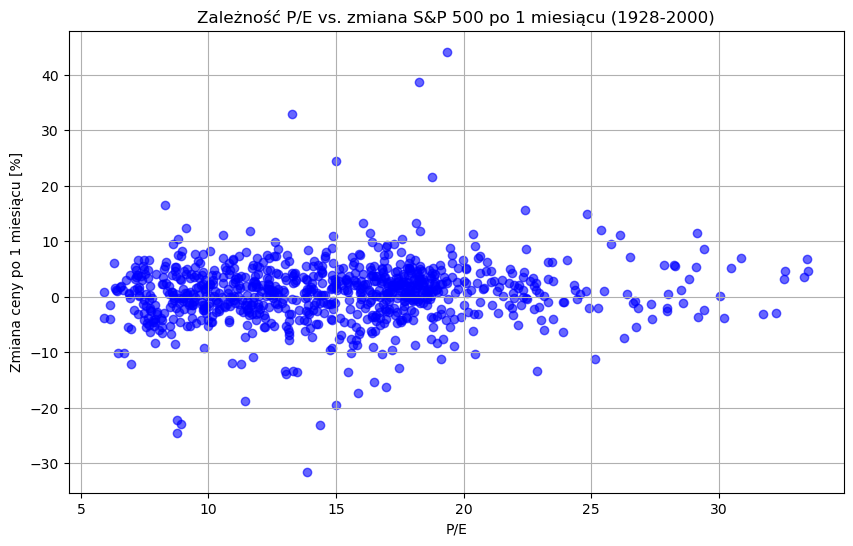

In [39]:
# Filtrujemy okres 1928-2000
df_scatter = df_merged[(df_merged['date'] >= '1928-01-01') & (df_merged['date'] <= '2000-12-31')]

plt.figure(figsize=(10,6))
plt.scatter(df_scatter['pe'], df_scatter['pct_change_1M'], color='blue', alpha=0.6)

plt.title('Zależność P/E vs. zmiana S&P 500 po 1 miesiącu (1928-2000)')
plt.xlabel('P/E')
plt.ylabel('Zmiana ceny po 1 miesiącu [%]')
plt.grid(True)

plt.show()

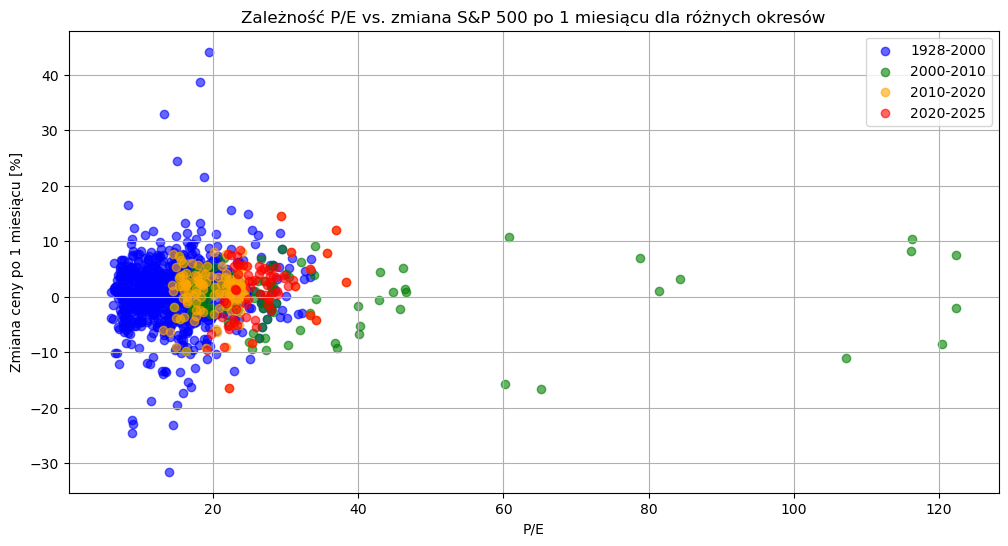

In [41]:
# Definiujemy okresy i kolory
periods = {
    '1928-2000': ('1928-01-01', '2000-12-31', 'blue'),
    '2000-2010': ('2000-01-01', '2010-12-31', 'green'),
    '2010-2020': ('2010-01-01', '2020-12-31', 'orange'),
    '2020-2025': ('2020-01-01', '2025-11-01', 'red')
}

plt.figure(figsize=(12,6))

for label, (start, end, color) in periods.items():
    df_period = df_merged[(df_merged['date'] >= start) & (df_merged['date'] <= end)]
    plt.scatter(df_period['pe'], df_period['pct_change_1M'], color=color, alpha=0.6, label=label)

plt.title('Zależność P/E vs. zmiana S&P 500 po 1 miesiącu dla różnych okresów')
plt.xlabel('P/E')
plt.ylabel('Zmiana ceny po 1 miesiącu [%]')
plt.grid(True)
plt.legend()
plt.show()

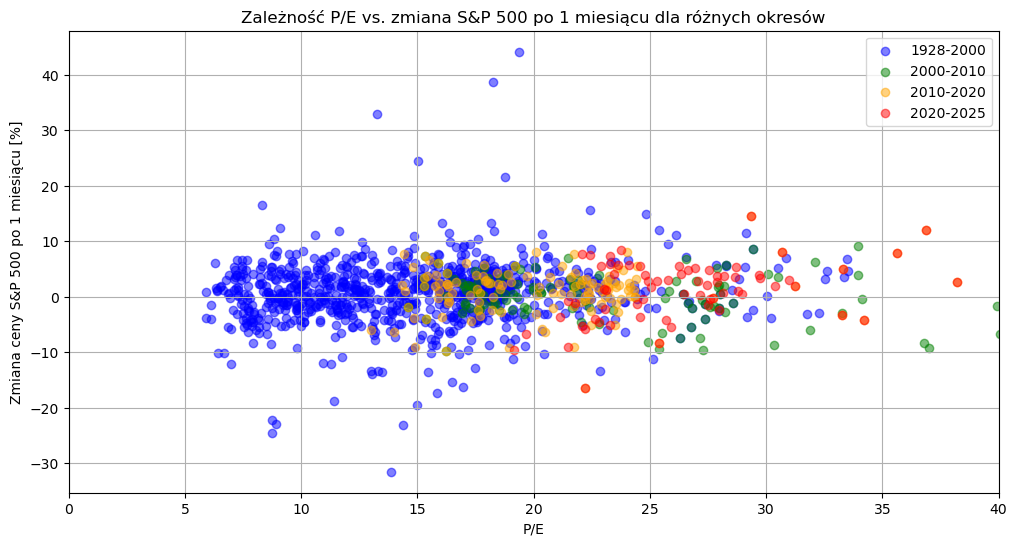

In [43]:
plt.figure(figsize=(12,6))

# Słownik do przechowywania średnich zwrotów
mean_returns = {}

for label, (start, end, color) in periods.items():
    df_period = df_merged[(df_merged['date'] >= start) & (df_merged['date'] <= end)]
    
    # Scatter plot
    plt.scatter(df_period['pe'], df_period['pct_change_1M'], color=color, alpha=0.5, label=label)
    
    # Średnia zmiana po 1M
    mean_returns[label] = df_period['pct_change_1M'].mean()

plt.title('Zależność P/E vs. zmiana S&P 500 po 1 miesiącu dla różnych okresów')
plt.xlabel('P/E')
plt.ylabel('Zmiana ceny S&P 500 po 1 miesiącu [%]')
plt.xlim(0, 40)  # ograniczenie osi X do P/E max 40
plt.grid(True)
plt.legend()

plt.show()

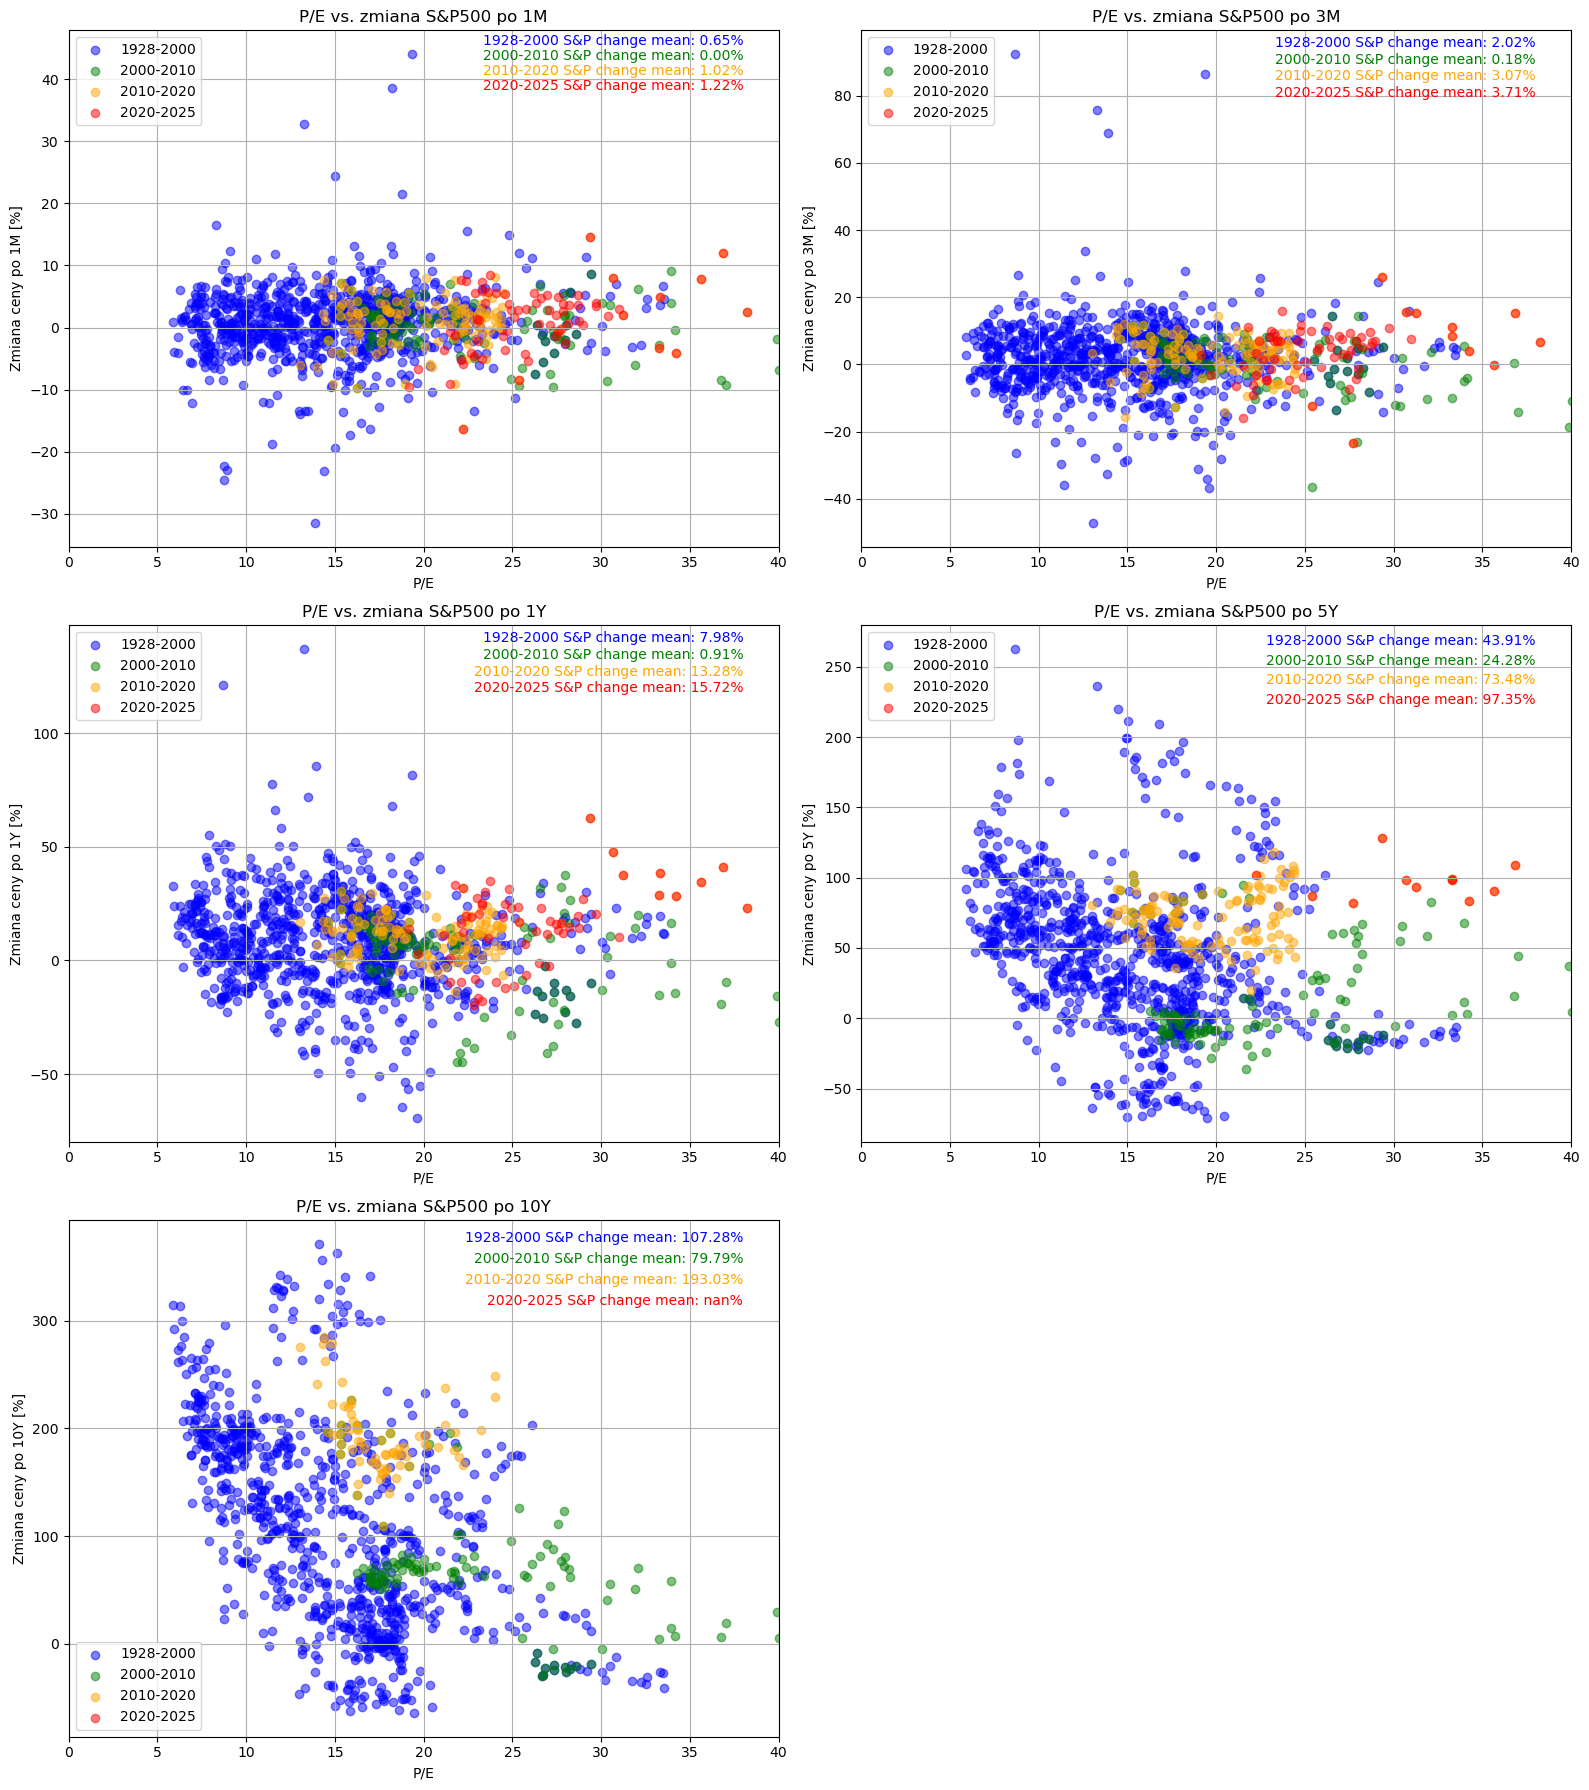

In [45]:
# Horyzonty i odpowiadające kolumny
horizons = {
    '1M': 'pct_change_1M',
    '3M': 'pct_change_3M',
    '1Y': 'pct_change_1Y',
    '5Y': 'pct_change_5Y',
    '10Y': 'pct_change_10Y'
}

fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.flatten()

for i, (label_h, col) in enumerate(horizons.items()):
    ax = axes[i]
    
    mean_returns = {}
    
    for period_label, (start, end, color) in periods.items():
        df_period = df_merged[(df_merged['date'] >= start) & (df_merged['date'] <= end)]
        
        # Scatter plot
        ax.scatter(df_period['pe'], df_period[col], color=color, alpha=0.5, label=period_label)
        
        # Średnia zmiana
        mean_returns[period_label] = df_period[col].mean()
    
    ax.set_title(f'P/E vs. zmiana S&P500 po {label_h}')
    ax.set_xlabel('P/E')
    ax.set_ylabel(f'Zmiana ceny po {label_h} [%]')
    ax.set_xlim(0, 40)  # ograniczenie P/E
    ax.grid(True)
    
    # Tekst ze średnimi w prawym górnym rogu
    text_y = ax.get_ylim()[1] * 0.95
    for j, (period_label, mean_val) in enumerate(mean_returns.items()):
        ax.text(0.95*40, text_y - j*0.05*ax.get_ylim()[1],
                f'{period_label} S&P change mean: {mean_val:.2f}%', color=periods[period_label][2],
                horizontalalignment='right')

    ax.legend()

# Usuwamy ostatni subplot, jeśli mamy 6 (bo 3x2)
if len(horizons) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

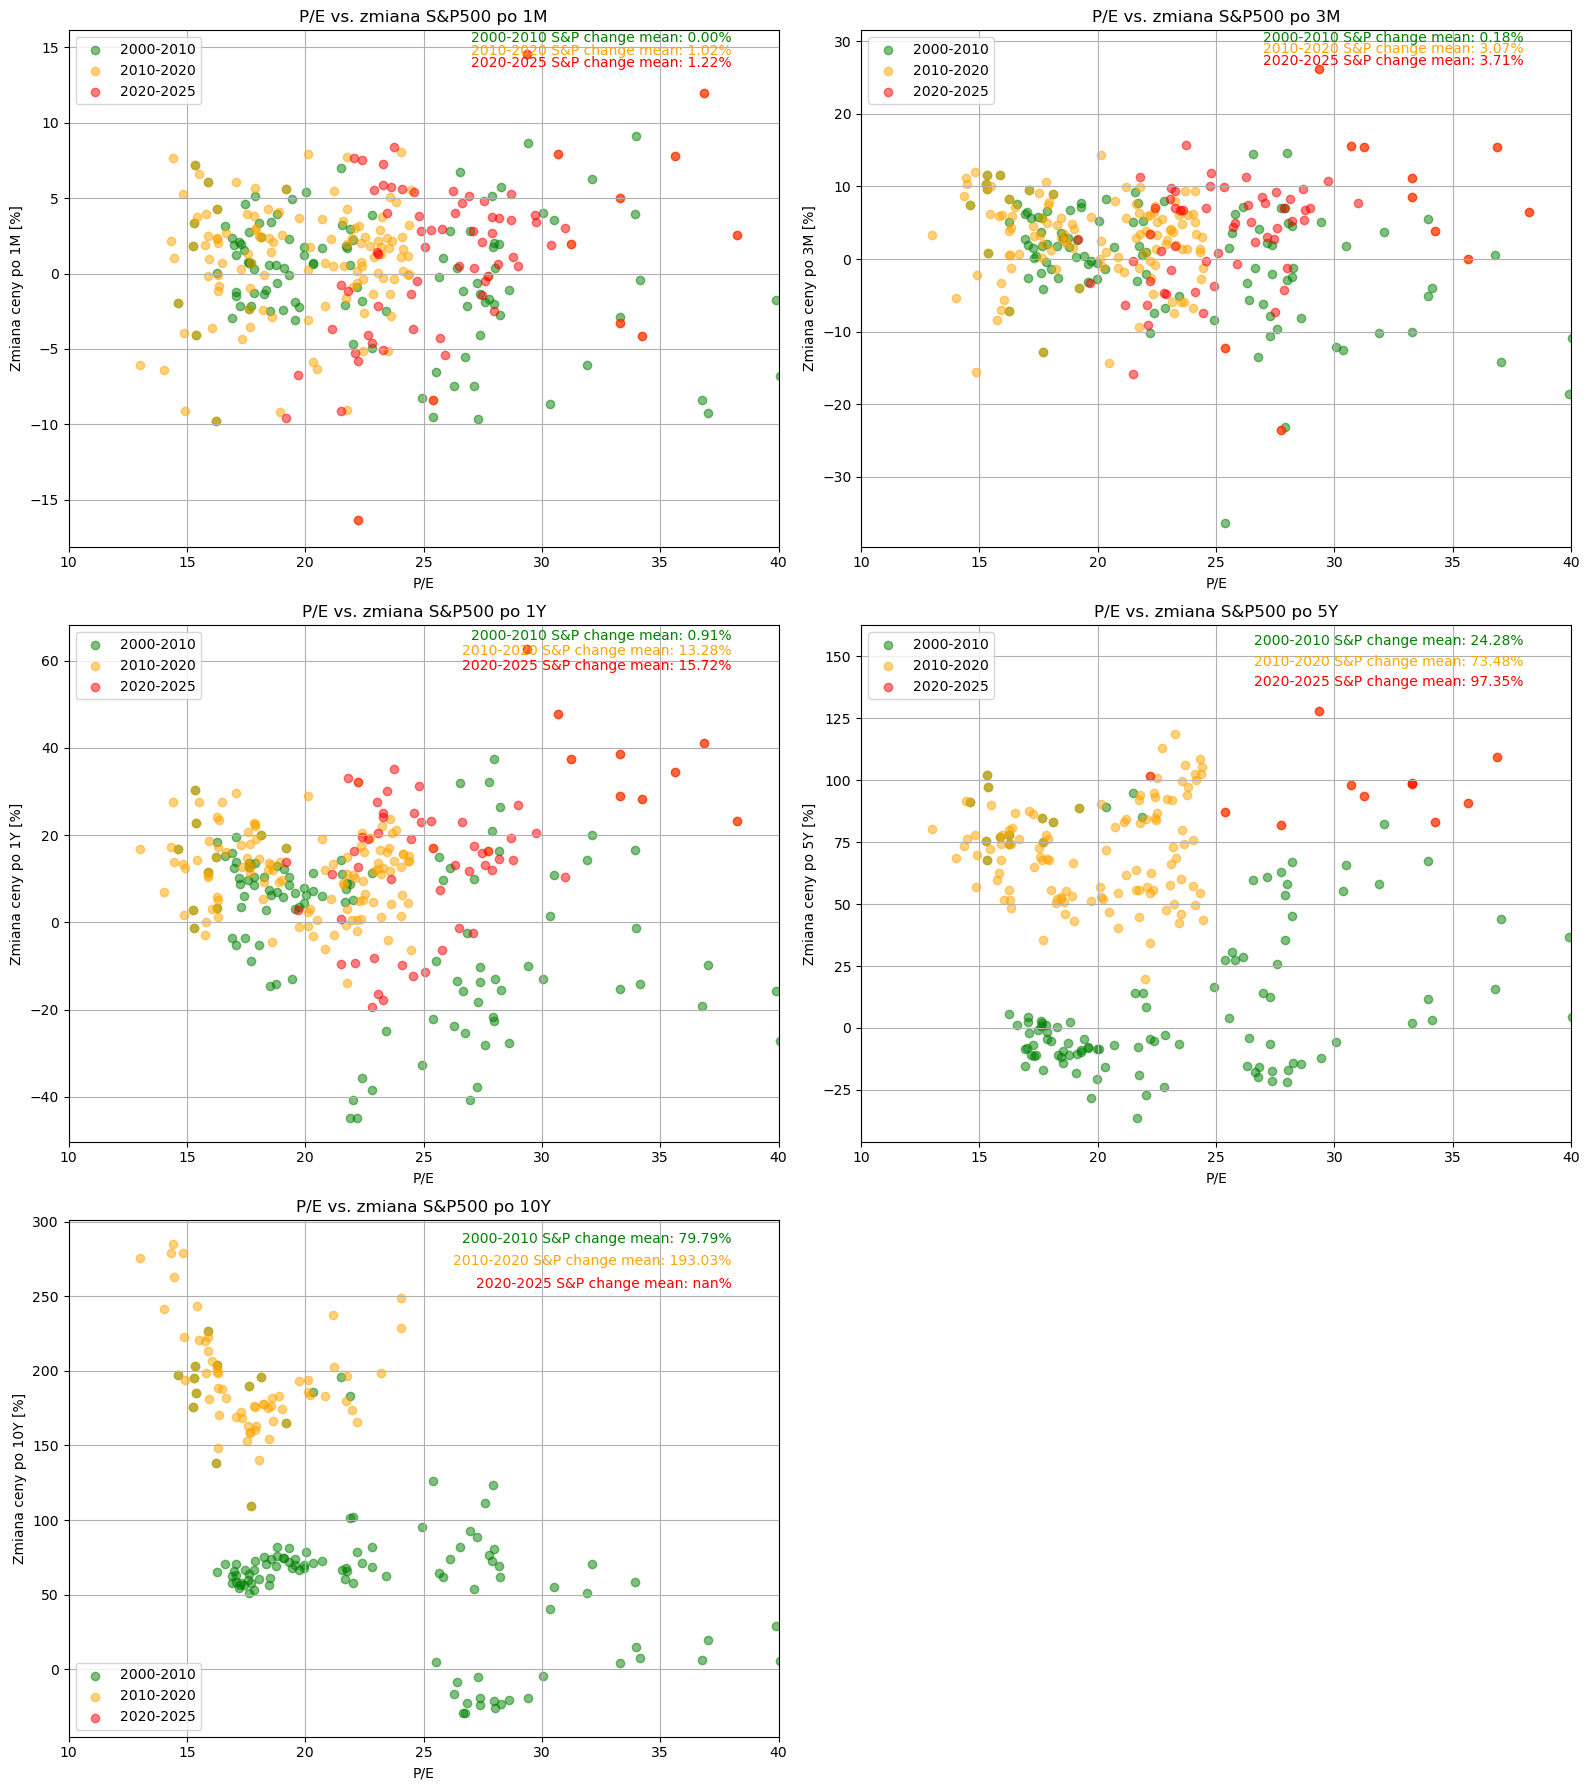

In [47]:
# Horyzonty i odpowiadające kolumny
horizons = {
    '1M': 'pct_change_1M',
    '3M': 'pct_change_3M',
    '1Y': 'pct_change_1Y',
    '5Y': 'pct_change_5Y',
    '10Y': 'pct_change_10Y'
}

fig, axes = plt.subplots(3, 2, figsize=(16, 18))
axes = axes.flatten()

for i, (label_h, col) in enumerate(horizons.items()):
    ax = axes[i]
    
    mean_returns = {}
    
    for period_label, (start, end, color) in periods.items():
        if period_label == '1928-2000':
            continue  # Pomijamy ten okres
        
        df_period = df_merged[(df_merged['date'] >= start) & (df_merged['date'] <= end)]
        
        # Scatter plot
        ax.scatter(df_period['pe'], df_period[col], color=color, alpha=0.5, label=period_label)
        
        # Średnia zmiana
        mean_returns[period_label] = df_period[col].mean()
    
    ax.set_title(f'P/E vs. zmiana S&P500 po {label_h}')
    ax.set_xlabel('P/E')
    ax.set_ylabel(f'Zmiana ceny po {label_h} [%]')
    ax.set_xlim(10, 40)  # ograniczenie P/E
    ax.grid(True)
    
    # Tekst ze średnimi w prawym górnym rogu
    text_y = ax.get_ylim()[1] * 0.95
    for j, (period_label, mean_val) in enumerate(mean_returns.items()):
        ax.text(0.95*40, text_y - j*0.05*ax.get_ylim()[1],
                f'{period_label} S&P change mean: {mean_val:.2f}%', color=periods[period_label][2],
                horizontalalignment='right')

    ax.legend()

# Usuwamy ostatni subplot, jeśli mamy 6 (bo 3x2)
if len(horizons) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

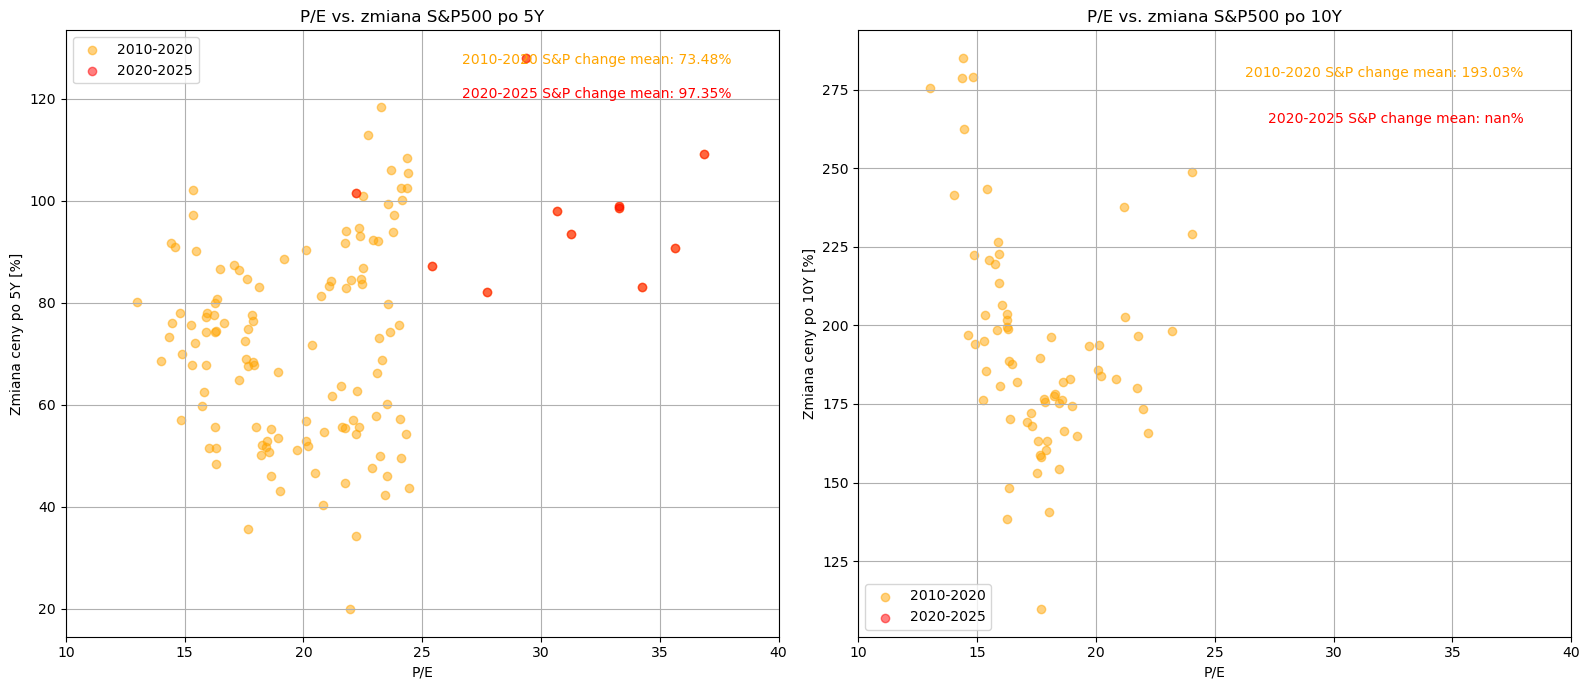

In [49]:
# Horyzonty do pokazania
horizons = {
    '5Y': 'pct_change_5Y',
    '10Y': 'pct_change_10Y'
}

# Wybrane okresy
selected_periods = {k:v for k,v in periods.items() if k in ['2010-2020', '2020-2025']}

fig, axes = plt.subplots(1, 2, figsize=(16, 7))
axes = axes.flatten()

for i, (label_h, col) in enumerate(horizons.items()):
    ax = axes[i]
    
    mean_returns = {}
    
    for period_label, (start, end, color) in selected_periods.items():
        df_period = df_merged[(df_merged['date'] >= start) & (df_merged['date'] <= end)]
        
        # Scatter plot
        ax.scatter(df_period['pe'], df_period[col], color=color, alpha=0.5, label=period_label)
        
        # Średnia zmiana
        mean_returns[period_label] = df_period[col].mean()
    
    ax.set_title(f'P/E vs. zmiana S&P500 po {label_h}')
    ax.set_xlabel('P/E')
    ax.set_ylabel(f'Zmiana ceny po {label_h} [%]')
    ax.set_xlim(10, 40)  # ograniczenie P/E
    ax.grid(True)
    
    # Tekst ze średnimi w prawym górnym rogu
    text_y = ax.get_ylim()[1] * 0.95
    for j, (period_label, mean_val) in enumerate(mean_returns.items()):
        ax.text(0.95*40, text_y - j*0.05*ax.get_ylim()[1],
                f'{period_label} S&P change mean: {mean_val:.2f}%', color=selected_periods[period_label][2],
                horizontalalignment='right')

    ax.legend()

plt.tight_layout()
plt.show()

In [61]:
# pobieramy dane ze strony multpl
url = "https://www.multpl.com/s-p-500-price-to-sales/table/by-quarter"
resp = requests.get(url)
soup = BeautifulSoup(resp.text, "html.parser")

# wyciągamy tabelę html
table = soup.find("table")
sp_ps = pd.read_html(str(table))[0]

# czyszczenie kolumny value
sp_ps["Value"] = (
    sp_ps["Value"]
    .astype(str)
    .str.replace("†", "", regex=False)  # usuwamy znacznik †
    .str.replace(",", "", regex=False)  # usuwamy przecinki
    .str.strip()
)
sp_ps["Value"] = pd.to_numeric(sp_ps["Value"], errors="coerce")

# konwersja dat
sp_ps["Date"] = pd.to_datetime(sp_ps["Date"], errors="coerce")

# sortowanie rosnąco (od najstarszej do najnowszej daty)
sp_ps = sp_ps.sort_values("Date").reset_index(drop=True)

# usunięcie odczytu po 30-09-2025
sp_ps = sp_ps[sp_ps["Date"] <= "2025-09-30"]

# reset index
sp_ps = sp_ps.reset_index(drop=True)

print(sp_ps.tail())

         Date  Value
95 2024-09-30   2.95
96 2024-12-31   2.98
97 2025-03-31   2.82
98 2025-06-30   3.08
99 2025-09-30   3.32


C:\Users\lukas\AppData\Local\Temp\ipykernel_17144\2436483730.py:8: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  sp_ps = pd.read_html(str(table))[0]


In [63]:
sp_ps.head()

,Date,Value
0,2000-12-31,1.77
1,2001-03-31,1.54
2,2001-06-30,1.64
3,2001-09-30,1.41
4,2001-12-31,1.56


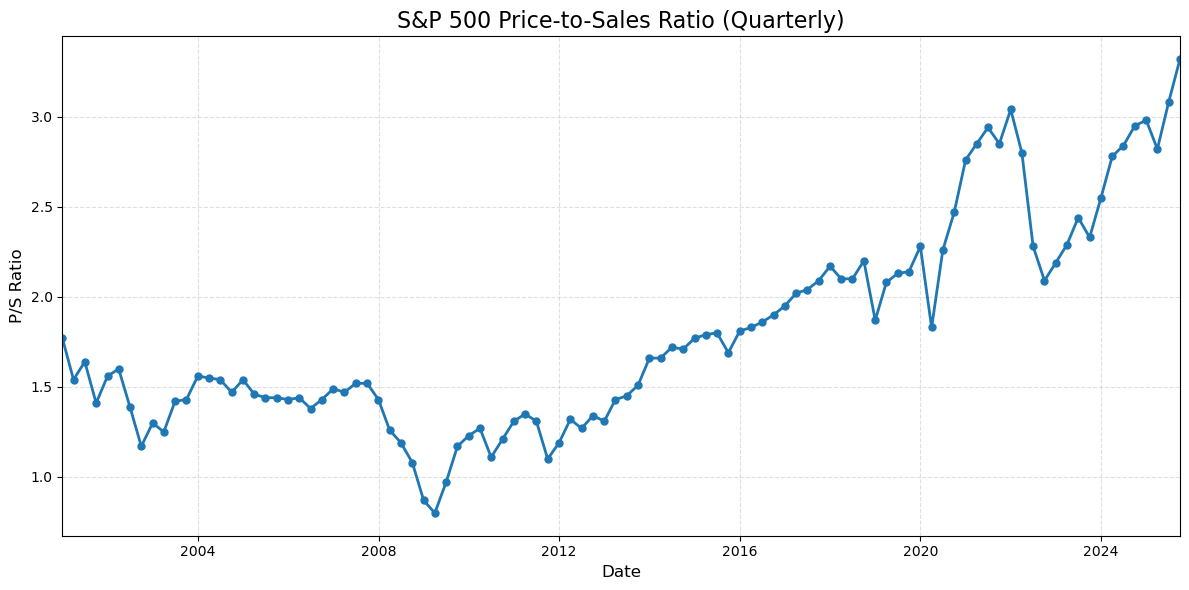

In [65]:
# filtrujemy od 31-12-2020
start_date = pd.to_datetime("2000-12-31")
sp_ps_plot = sp_ps[sp_ps["Date"] >= start_date].copy()

plt.figure(figsize=(12, 6))

plt.plot(
    sp_ps_plot["Date"],
    sp_ps_plot["Value"],
    marker="o",
    markersize=5,
    linewidth=2,
    color="#1f77b4"
)

plt.title("S&P 500 Price-to-Sales Ratio (Quarterly)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("P/S Ratio", fontsize=12)

plt.grid(True, which="both", linestyle="--", alpha=0.4)

# usuwamy pustą przestrzeń z lewej strony
plt.xlim(sp_ps_plot["Date"].min(), sp_ps_plot["Date"].max())

plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

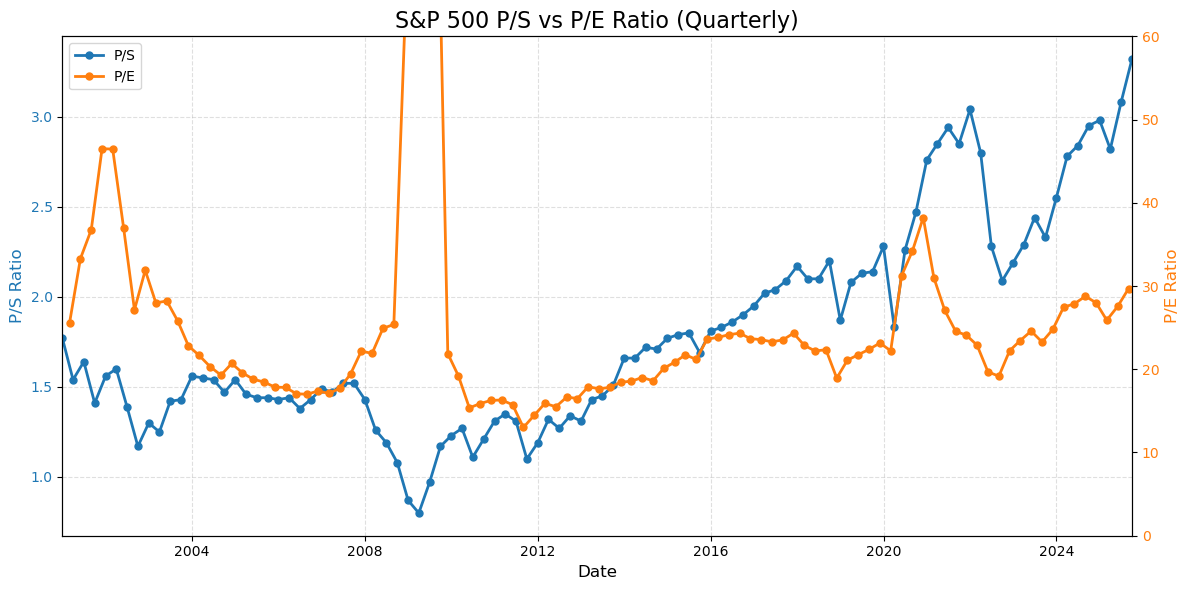

In [67]:
# filtrujemy od 31-12-2020
start_date = pd.to_datetime("2000-12-31")

# P/S
sp_ps_plot = sp_ps[sp_ps["Date"] >= start_date].copy()

# P/E tylko dane kwartalne
df_plot = df[pd.to_datetime(df["date"]) >= start_date].copy()
df_plot["date"] = pd.to_datetime(df_plot["date"])

# Zachowujemy tylko końce kwartałów (mar, cze, wrz, gru)
df_plot = df_plot[df_plot["date"].dt.month.isin([3, 6, 9, 12])]

plt.figure(figsize=(12, 6))

# Oś główna: P/S
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(
    sp_ps_plot["Date"],
    sp_ps_plot["Value"],  # P/S
    marker="o",
    markersize=5,
    linewidth=2,
    color="#1f77b4",
    label="P/S"
)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("P/S Ratio", fontsize=12, color="#1f77b4")
ax1.tick_params(axis="y", labelcolor="#1f77b4")
ax1.grid(True, which="both", linestyle="--", alpha=0.4)

# Druga oś Y: P/E
ax2 = ax1.twinx()
ax2.plot(
    df_plot["date"],
    df_plot["pe"],
    marker="o",
    markersize=5,
    linewidth=2,
    color="#ff7f0e",
    label="P/E"
)
ax2.set_ylabel("P/E Ratio", fontsize=12, color="#ff7f0e")
ax2.tick_params(axis="y", labelcolor="#ff7f0e")

# Ograniczenie osi P/E do 60
ax2.set_ylim(0, 60)

# Ustawienie zakresu osi X
ax1.set_xlim(sp_ps_plot["Date"].min(), sp_ps_plot["Date"].max())

# Tytuł i legenda
plt.title("S&P 500 P/S vs P/E Ratio (Quarterly)", fontsize=16)

# Połączenie legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

plt.tight_layout()
plt.show()

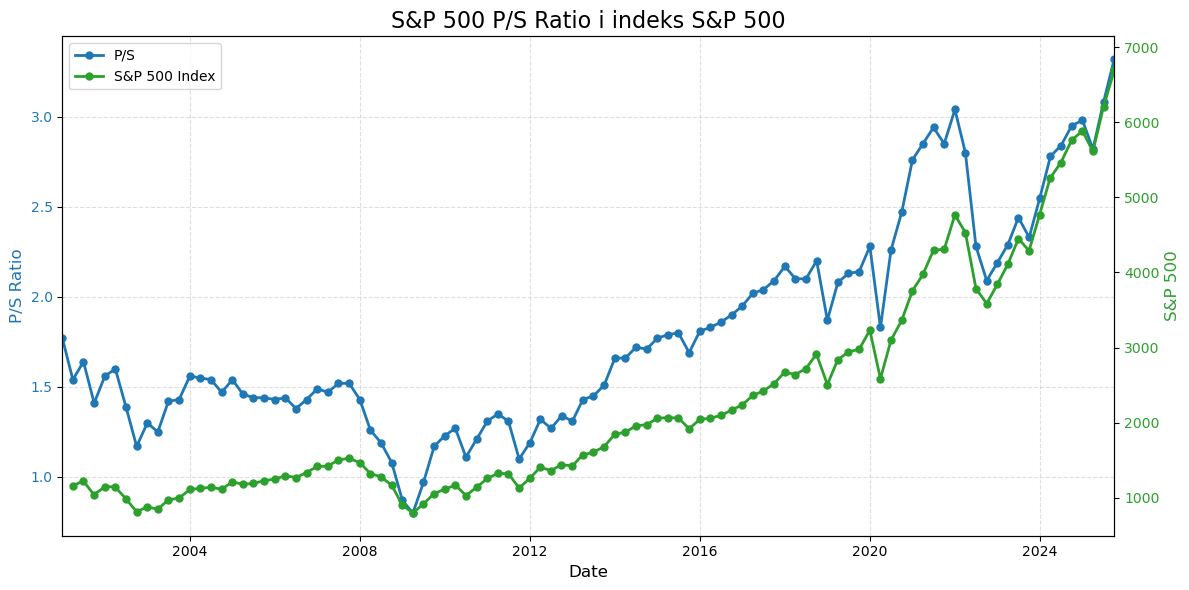

In [71]:
# filtrujemy od 31-12-2020
start_date = pd.to_datetime("2000-12-31")

# P/S
sp_ps_plot = sp_ps[sp_ps["Date"] >= start_date].copy()

# S&P 500 - wybieramy dokładnie ostatni dzień kwartału
sp500_plot = sp500[sp500["Date"] >= start_date].copy()
sp500_plot["Date"] = pd.to_datetime(sp500_plot["Date"])
# wybór ostatniego dnia kwartału
sp500_plot = sp500_plot.groupby([sp500_plot["Date"].dt.year, sp500_plot["Date"].dt.quarter]).last().reset_index(drop=True)

fig, ax1 = plt.subplots(figsize=(12, 6))

# Oś główna: P/S
ax1.plot(
    sp_ps_plot["Date"],
    sp_ps_plot["Value"],
    marker="o",
    markersize=5,
    linewidth=2,
    color="#1f77b4",
    label="P/S"
)
ax1.set_xlabel("Date", fontsize=12)
ax1.set_ylabel("P/S Ratio", fontsize=12, color="#1f77b4")
ax1.tick_params(axis="y", labelcolor="#1f77b4")
ax1.grid(True, which="both", linestyle="--", alpha=0.4)

# Druga oś Y: S&P 500 Close
ax2 = ax1.twinx()
ax2.plot(
    sp500_plot["Date"],
    sp500_plot["Close"],
    marker="o",
    markersize=5,
    linewidth=2,
    color="#2ca02c",
    label="S&P 500 Index"
)
ax2.set_ylabel("S&P 500", fontsize=12, color="#2ca02c")
ax2.tick_params(axis="y", labelcolor="#2ca02c")

# Zakres osi X
ax1.set_xlim(sp_ps_plot["Date"].min(), sp_ps_plot["Date"].max())

# Tytuł i legenda
plt.title("S&P 500 P/S Ratio i indeks S&P 500", fontsize=16)

# Połączenie legend
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc="upper left")

plt.tight_layout()
plt.show()

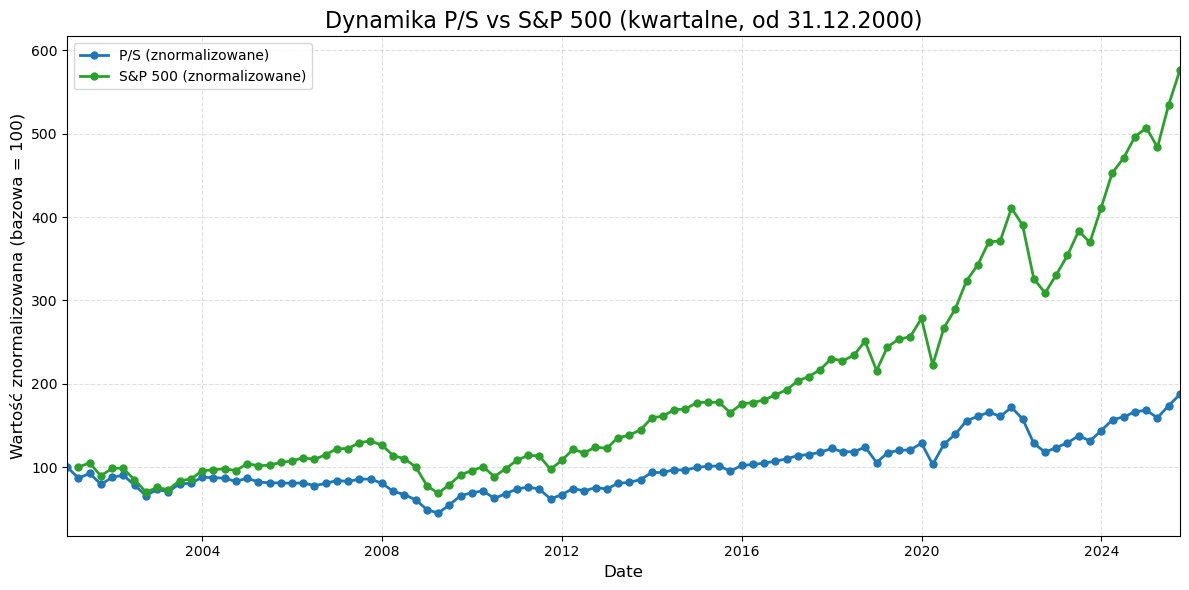

In [73]:
start_date = pd.to_datetime("2000-12-31")

# P/S
sp_ps_plot = sp_ps[sp_ps["Date"] >= start_date].copy()

# S&P 500 - tylko ostatni dzień kwartału
sp500_plot = sp500[sp500["Date"] >= start_date].copy()
sp500_plot["Date"] = pd.to_datetime(sp500_plot["Date"])
sp500_plot = sp500_plot.groupby([sp500_plot["Date"].dt.year, sp500_plot["Date"].dt.quarter]).last().reset_index(drop=True)

# Normalizacja do wartości początkowej 100
sp_ps_plot["Value_norm"] = sp_ps_plot["Value"] / sp_ps_plot["Value"].iloc[0] * 100
sp500_plot["Close_norm"] = sp500_plot["Close"] / sp500_plot["Close"].iloc[0] * 100

fig, ax = plt.subplots(figsize=(12, 6))

# P/S
ax.plot(
    sp_ps_plot["Date"],
    sp_ps_plot["Value_norm"],
    marker="o",
    markersize=5,
    linewidth=2,
    color="#1f77b4",
    label="P/S (znormalizowane)"
)

# S&P 500
ax.plot(
    sp500_plot["Date"],
    sp500_plot["Close_norm"],
    marker="o",
    markersize=5,
    linewidth=2,
    color="#2ca02c",
    label="S&P 500 (znormalizowane)"
)

ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Wartość znormalizowana (bazowa = 100)", fontsize=12)
ax.grid(True, which="both", linestyle="--", alpha=0.4)

# Zakres osi X bez pustego miejsca z lewej
ax.set_xlim(sp_ps_plot["Date"].min(), sp_ps_plot["Date"].max())

plt.title("Dynamika P/S vs S&P 500 (kwartalne, od 31.12.2000)", fontsize=16)
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

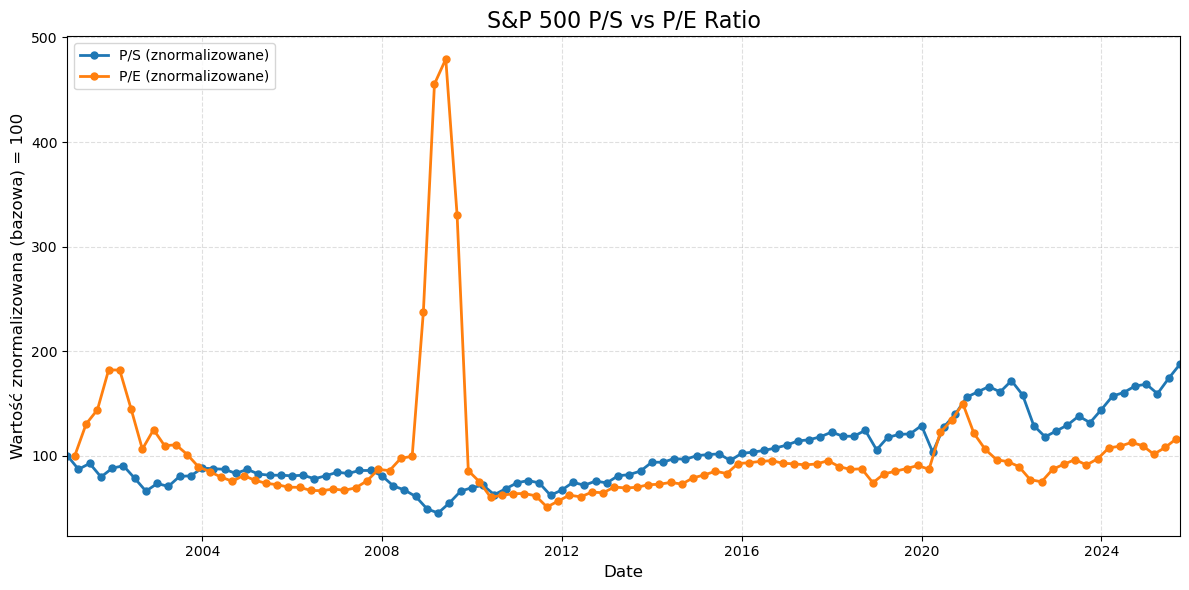

In [75]:
start_date = pd.to_datetime("2000-12-31")

# P/S
sp_ps_plot = sp_ps[sp_ps["Date"] >= start_date].copy()
sp_ps_plot = sp_ps_plot.sort_values("Date").reset_index(drop=True)
sp_ps_plot["Value_norm"] = sp_ps_plot["Value"].astype(float) / sp_ps_plot["Value"].iloc[0] * 100

# P/E tylko dane kwartalne
df_plot = df[pd.to_datetime(df["date"]) >= start_date].copy()
df_plot["date"] = pd.to_datetime(df_plot["date"])
df_plot = df_plot[df_plot["date"].dt.month.isin([3, 6, 9, 12])]
df_plot = df_plot.sort_values("date").reset_index(drop=True)
df_plot["pe_norm"] = df_plot["pe"].astype(float) / df_plot["pe"].iloc[0] * 100

# Wykres
plt.figure(figsize=(12, 6))

# P/S
plt.plot(
    sp_ps_plot["Date"],
    sp_ps_plot["Value_norm"],
    marker="o",
    markersize=5,
    linewidth=2,
    color="#1f77b4",
    label="P/S (znormalizowane)"
)

# P/E
plt.plot(
    df_plot["date"],
    df_plot["pe_norm"],
    marker="o",
    markersize=5,
    linewidth=2,
    color="#ff7f0e",
    label="P/E (znormalizowane)"
)

plt.xlabel("Date", fontsize=12)
plt.ylabel("Wartość znormalizowana (bazowa) = 100", fontsize=12)
plt.grid(True, which="both", linestyle="--", alpha=0.4)
plt.title("S&P 500 P/S vs P/E Ratio", fontsize=16)
plt.xlim(sp_ps_plot["Date"].min(), sp_ps_plot["Date"].max())
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

In [79]:
url = "https://www.multpl.com/s-p-500-sales-growth/table/by-quarter"

df = pd.read_html(url, header=0)[0]

# nazwy kolumn
df.columns = ["Date", "sales_growth_per_share_pct"]

# konwersja dat
df["Date"] = pd.to_datetime(df["Date"])

# konwersja wartości — usuwamy znak % i zmieniamy na float
df["sales_growth_per_share_pct"] = (
    df["sales_growth_per_share_pct"]
      .str.replace("%","", regex=False)
      .astype(float)
)

# zapis do sales_per_share
sales_per_share = df.copy()

# podgląd
print(sales_per_share.head())

        Date  sales_growth_per_share_pct
0 2025-06-30                        4.83
1 2025-03-31                        4.98
2 2024-12-31                        5.25
3 2024-09-30                        5.89
4 2024-06-30                        5.38


In [81]:
# Tworzymy kolumnę z rocznym przesunięciem
sales_per_share["sales_growth_per_share_yoy"] = sales_per_share["sales_growth_per_share_pct"].shift(4)

# Podgląd pierwszych kilku wierszy
print(sales_per_share)

         Date  sales_growth_per_share_pct  sales_growth_per_share_yoy
0  2025-06-30                        4.83                         NaN
1  2025-03-31                        4.98                         NaN
2  2024-12-31                        5.25                         NaN
3  2024-09-30                        5.89                         NaN
4  2024-06-30                        5.38                        4.83
..        ...                         ...                         ...
90 2002-12-31                       -8.45                        5.37
91 2002-09-30                       -5.56                        0.02
92 2002-06-30                       -5.07                       -3.64
93 2002-03-31                       -4.43                       -5.49
94 2001-12-31                       -1.18                       -8.45

[95 rows x 3 columns]


In [83]:
# Tworzymy słownik z datami i prognozami
prognozy = {
    "2024-09-30": 8.4,
    "2024-12-31": 7.3,
    "2025-03-31": 7.9,
    "2025-06-30": 7.0
}

# Konwersja kolumny Date na string w formacie YYYY-MM-DD, aby dopasować klucze
sales_per_share["Date_str"] = sales_per_share["Date"].dt.strftime("%Y-%m-%d")

# Uzupełnienie wartości prognozowanych
sales_per_share["sales_growth_per_share_yoy"] = sales_per_share.apply(
    lambda row: prognozy[row["Date_str"]] if row["Date_str"] in prognozy else row["sales_growth_per_share_yoy"],
    axis=1
)

# Usuwamy tymczasową kolumnę
sales_per_share.drop(columns=["Date_str"], inplace=True)

In [85]:
sales_per_share.head()

,Date,sales_growth_per_share_pct,sales_growth_per_share_yoy
0,2025-06-30,4.83,7.00
1,2025-03-31,4.98,7.90
2,2024-12-31,5.25,7.30
3,2024-09-30,5.89,8.40
4,2024-06-30,5.38,4.83


In [89]:
# Przesunięcie dat w sales_per_share o 1 dzień do przodu
sales_per_share["Date_shifted"] = sales_per_share["Date"] + timedelta(days=1)

# Połączenie z df_merged
df_merged["date"] = pd.to_datetime(df_merged["date"])

peg_df = pd.merge(
    df_merged,
    sales_per_share[["Date_shifted", "sales_growth_per_share_yoy"]],
    left_on="date",
    right_on="Date_shifted",
    how="left"
)

# Obliczenie PEG
peg_df["PEG"] = peg_df["pe"] / peg_df["sales_growth_per_share_yoy"]

# Sortowanie po dacie
peg_df.sort_values("date", inplace=True)

In [91]:
peg_df.head()

,date,pe,Close,sp500_after_1M,sp500_after_3M,sp500_after_1Y,sp500_after_5Y,sp500_after_10Y,pct_change_1M,pct_change_3M,pct_change_1Y,pct_change_5Y,pct_change_10Y,Date_shifted,sales_growth_per_share_yoy,PEG
0,1928-01-01,14.8898,17.660000,17.530001,19.280001,24.350000,6.92,10.55,-0.736122,9.173278,37.882223,-60.815401,-40.260474,NaT,NaN,NaN
1,1928-02-01,14.6271,17.530001,17.299999,19.780001,25.840000,6.67,10.89,-1.312045,12.835139,47.404445,-61.950942,-37.877924,NaT,NaN,NaN
2,1928-03-01,16.3390,17.299999,19.280001,20.070000,25.830000,5.77,11.46,11.445096,16.011564,49.306365,-66.647397,-33.757222,NaT,NaN,NaN
3,1928-04-01,15.8000,19.280001,19.780001,19.139999,24.879999,5.85,8.91,2.593361,-0.726148,29.045634,-69.657678,-53.786309,NaT,NaN,NaN
4,1928-05-01,16.0000,19.780001,20.070000,19.420000,25.990000,8.43,9.78,1.466122,-1.820023,31.395343,-57.381193,-50.556120,NaT,NaN,NaN


In [93]:
# Filtrujemy tylko wiersze z wartościami sales_growth_per_share_yoy
peg_filtered = peg_df[peg_df["sales_growth_per_share_yoy"].notna()].copy()

# obliczamy PEG
peg_filtered["PEG"] = peg_filtered["pe"] / peg_filtered["sales_growth_per_share_yoy"]

# Wybór kolumn
peg_filtered = peg_filtered[["Date_shifted", "pe", "sales_growth_per_share_yoy", "PEG"]]

# Podgląd
print(peg_filtered)

     Date_shifted       pe  sales_growth_per_share_yoy          PEG
888    2002-01-01  45.7571                       -8.45    -5.415041
891    2002-04-01  40.2737                       -5.49    -7.335829
894    2002-07-01  30.3469                       -3.64    -8.337060
897    2002-10-01  32.1044                        0.02  1605.220000
900    2003-01-01  28.2223                        5.37     5.255549
...           ...      ...                         ...          ...
1158   2024-07-01  27.5743                        4.83     5.708965
1161   2024-10-01  27.1468                        8.40     3.231762
1164   2025-01-01  27.8764                        7.30     3.818685
1167   2025-04-01  24.7217                        7.90     3.129329
1170   2025-07-01  28.1413                        7.00     4.020186

[95 rows x 4 columns]


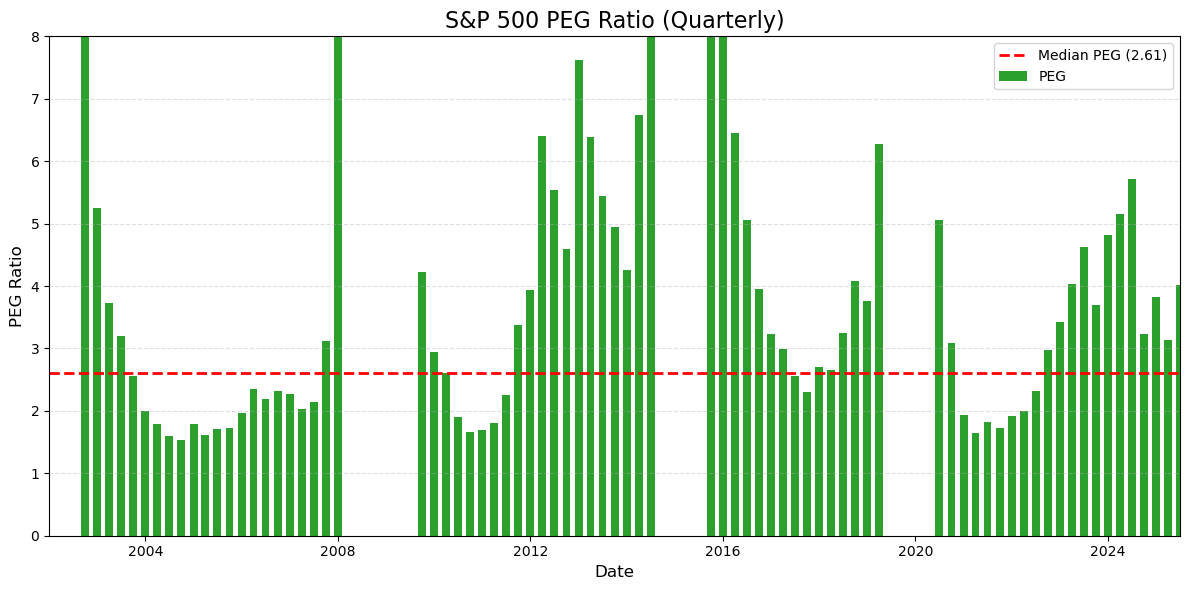

In [97]:
# Obliczamy medianę PEG
peg_median = peg_filtered["PEG"].median()

plt.figure(figsize=(12, 6))
plt.bar(
    peg_filtered["Date_shifted"],
    peg_filtered["PEG"],
    color="#2ca02c",
    width=60,
    label="PEG"
)

# Dodanie poziomej linii mediany
plt.axhline(
    y=peg_median,
    color="red",
    linestyle="--",
    linewidth=2,
    label=f"Median PEG ({peg_median:.2f})"
)

plt.xlabel("Date", fontsize=12)
plt.ylabel("PEG Ratio", fontsize=12)
plt.title("S&P 500 PEG Ratio (Quarterly)", fontsize=16)
plt.ylim(0, 8)
plt.xlim(peg_filtered["Date_shifted"].min(), peg_filtered["Date_shifted"].max())
plt.grid(True, axis='y', linestyle="--", alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show()

In [99]:
peg_filtered.nlargest(5, "PEG")

,Date_shifted,pe,sales_growth_per_share_yoy,PEG
897,2002-10-01,32.1044,0.02,1605.220000
1053,2015-10-01,24.0305,0.20,120.152500
1038,2014-07-01,18.2207,0.38,47.949211
960,2008-01-01,22.8275,1.70,13.427941
1056,2016-01-01,22.4461,2.09,10.739761


In [101]:
peg_filtered.describe()

,Date_shifted,pe,sales_growth_per_share_yoy,PEG
count,95,95.000000,95.000000,95.000000
mean,2013-09-30 18:41:41.052631552,25.323915,4.880632,18.689223
min,2002-01-01 00:00:00,14.414000,-16.460000,-69.075789
25%,2007-11-16 00:00:00,18.041850,2.595000,1.718309
50%,2013-10-01 00:00:00,22.077700,5.980000,2.612319
75%,2019-08-16 00:00:00,25.493600,8.620000,4.153383
max,2025-07-01 00:00:00,120.390700,15.970000,1605.220000
std,NaN,16.388357,5.983676,165.374263


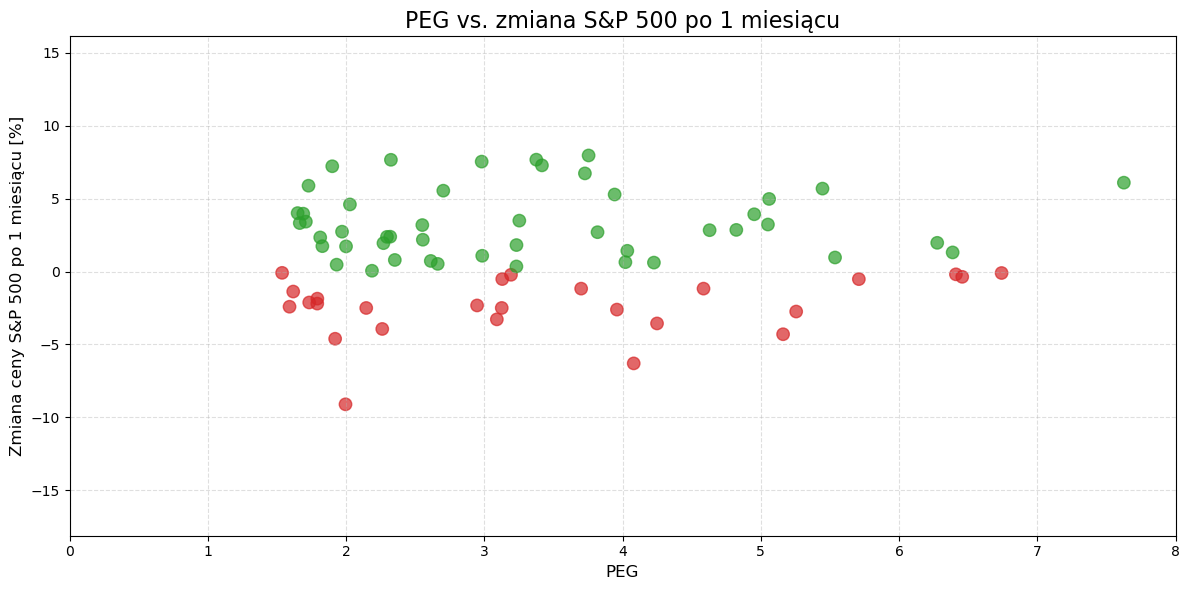

In [103]:
# Łączymy dane PEG i pct_change_1M
merged_plot = pd.merge(
    peg_filtered[["Date_shifted", "PEG"]],
    df_merged[["date", "pct_change_1M"]],
    left_on="Date_shifted",
    right_on="date",
    how="inner"
)

# Filtr PEG <= 8
merged_plot = merged_plot[merged_plot["PEG"] <= 8]

# Kolory: zielony jeśli zmiana >=0, czerwony jeśli <0
colors = merged_plot["pct_change_1M"].apply(lambda x: "#2ca02c" if x >= 0 else "#d62728")

plt.figure(figsize=(12,6))
plt.scatter(merged_plot["PEG"], merged_plot["pct_change_1M"], color=colors, alpha=0.7, s=80)
plt.xlabel("PEG", fontsize=12)
plt.ylabel("Zmiana ceny S&P 500 po 1 miesiącu [%]", fontsize=12)
plt.title("PEG vs. zmiana S&P 500 po 1 miesiącu", fontsize=16)
plt.xlim(0, 8)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

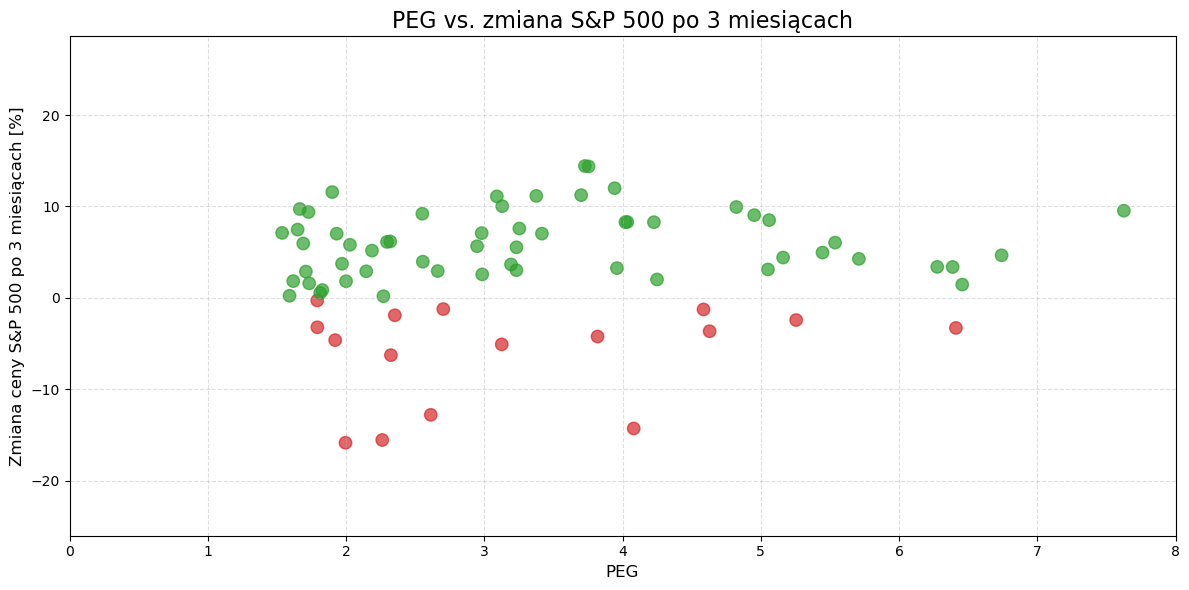

In [105]:
merged_plot = pd.merge(
    peg_filtered[["Date_shifted", "PEG"]],
    df_merged[["date", "pct_change_3M"]],
    left_on="Date_shifted",
    right_on="date",
    how="inner"
)
merged_plot = merged_plot[merged_plot["PEG"] <= 8]
colors = merged_plot["pct_change_3M"].apply(lambda x: "#2ca02c" if x >= 0 else "#d62728")

plt.figure(figsize=(12,6))
plt.scatter(merged_plot["PEG"], merged_plot["pct_change_3M"], color=colors, alpha=0.7, s=80)
plt.xlabel("PEG", fontsize=12)
plt.ylabel("Zmiana ceny S&P 500 po 3 miesiącach [%]", fontsize=12)
plt.title("PEG vs. zmiana S&P 500 po 3 miesiącach", fontsize=16)
plt.xlim(0, 8)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

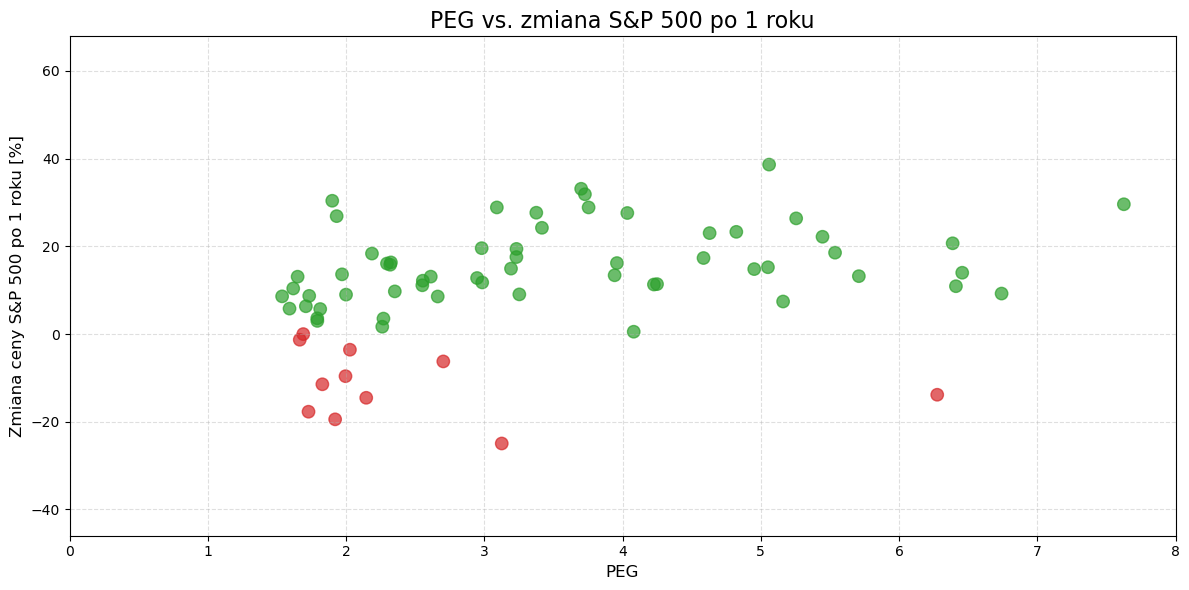

In [107]:
merged_plot = pd.merge(
    peg_filtered[["Date_shifted", "PEG"]],
    df_merged[["date", "pct_change_1Y"]],
    left_on="Date_shifted",
    right_on="date",
    how="inner"
)
merged_plot = merged_plot[merged_plot["PEG"] <= 8]
colors = merged_plot["pct_change_1Y"].apply(lambda x: "#2ca02c" if x >= 0 else "#d62728")

plt.figure(figsize=(12,6))
plt.scatter(merged_plot["PEG"], merged_plot["pct_change_1Y"], color=colors, alpha=0.7, s=80)
plt.xlabel("PEG", fontsize=12)
plt.ylabel("Zmiana ceny S&P 500 po 1 roku [%]", fontsize=12)
plt.title("PEG vs. zmiana S&P 500 po 1 roku", fontsize=16)
plt.xlim(0, 8)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

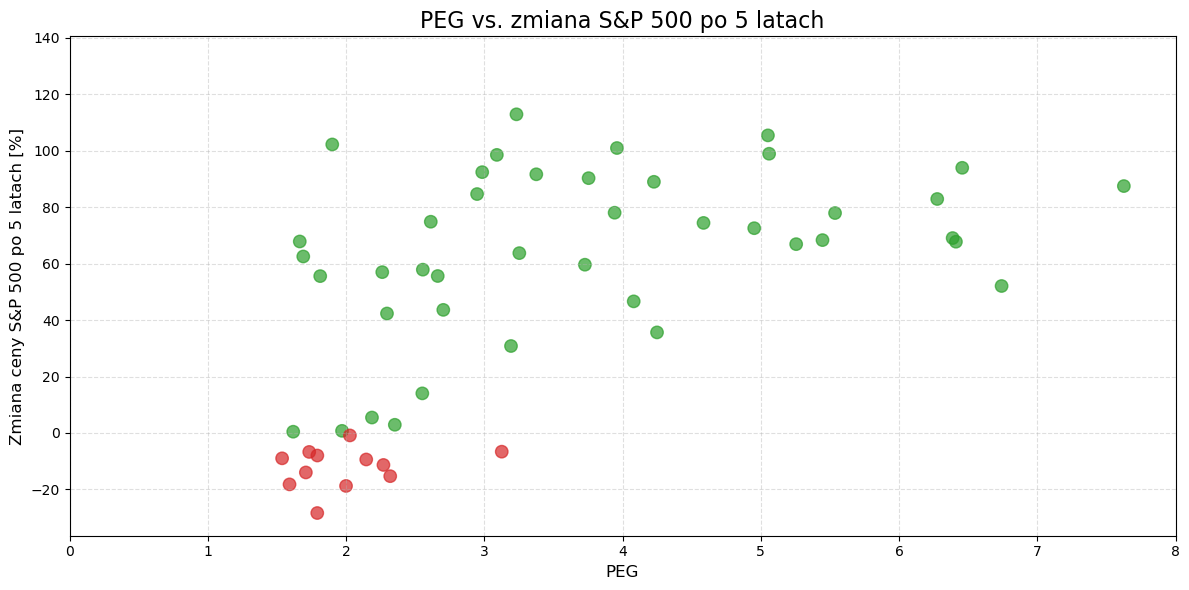

In [109]:
merged_plot = pd.merge(
    peg_filtered[["Date_shifted", "PEG"]],
    df_merged[["date", "pct_change_5Y"]],
    left_on="Date_shifted",
    right_on="date",
    how="inner"
)
merged_plot = merged_plot[merged_plot["PEG"] <= 8]
colors = merged_plot["pct_change_5Y"].apply(lambda x: "#2ca02c" if x >= 0 else "#d62728")

plt.figure(figsize=(12,6))
plt.scatter(merged_plot["PEG"], merged_plot["pct_change_5Y"], color=colors, alpha=0.7, s=80)
plt.xlabel("PEG", fontsize=12)
plt.ylabel("Zmiana ceny S&P 500 po 5 latach [%]", fontsize=12)
plt.title("PEG vs. zmiana S&P 500 po 5 latach", fontsize=16)
plt.xlim(0, 8)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

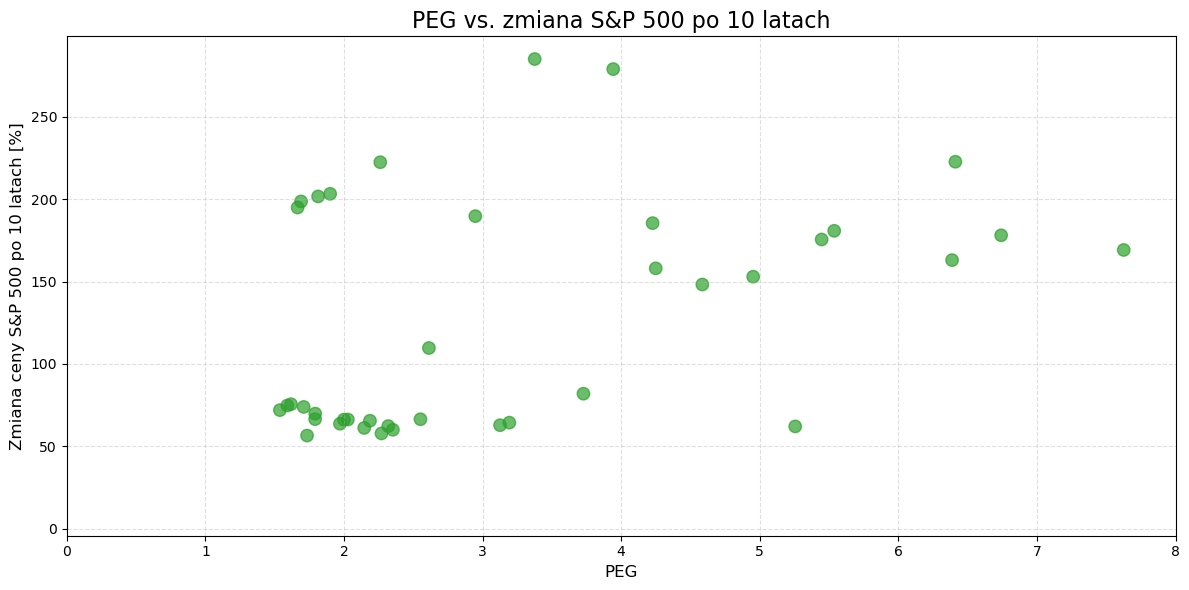

In [111]:
merged_plot = pd.merge(
    peg_filtered[["Date_shifted", "PEG"]],
    df_merged[["date", "pct_change_10Y"]],
    left_on="Date_shifted",
    right_on="date",
    how="inner"
)
merged_plot = merged_plot[merged_plot["PEG"] <= 8]
colors = merged_plot["pct_change_10Y"].apply(lambda x: "#2ca02c" if x >= 0 else "#d62728")

plt.figure(figsize=(12,6))
plt.scatter(merged_plot["PEG"], merged_plot["pct_change_10Y"], color=colors, alpha=0.7, s=80)
plt.xlabel("PEG", fontsize=12)
plt.ylabel("Zmiana ceny S&P 500 po 10 latach [%]", fontsize=12)
plt.title("PEG vs. zmiana S&P 500 po 10 latach", fontsize=16)
plt.xlim(0, 8)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()

In [113]:
# Łączymy PEG z wszystkimi pct_change
peg_pct_table = pd.merge(
    peg_filtered[["Date_shifted", "PEG"]],
    df_merged[["date", "pct_change_1M", "pct_change_3M", "pct_change_1Y", "pct_change_5Y", "pct_change_10Y"]],
    left_on="Date_shifted",
    right_on="date",
    how="inner"
)

# Wybieramy tylko potrzebne kolumny i opcjonalnie sortujemy po dacie
peg_pct_table = peg_pct_table[["Date_shifted", "PEG", "pct_change_1M", "pct_change_3M", "pct_change_1Y", "pct_change_5Y", "pct_change_10Y"]]
peg_pct_table = peg_pct_table.sort_values("Date_shifted").reset_index(drop=True)

# Wyświetlenie tabeli
peg_pct_table

,Date_shifted,PEG,pct_change_1M,pct_change_3M,pct_change_1Y,pct_change_5Y,pct_change_10Y
0,2002-01-01,-5.415041,-2.254199,-0.134130,-23.365964,23.536696,9.539407
1,2002-04-01,-7.335829,-5.240120,-15.515377,-25.124291,23.925893,22.845249
2,2002-07-01,-8.337060,-8.670836,-12.464776,1.411241,55.200530,40.624581
3,2002-10-01,1605.220000,6.256566,3.763375,20.085859,82.453337,70.358887
4,2003-01-01,5.255549,-2.741469,-2.425499,26.380400,66.893225,62.100194
...,...,...,...,...,...,...,...
90,2024-07-01,5.708965,-0.518890,4.267695,13.203800,NaN,NaN
91,2024-10-01,3.231762,0.351212,3.028332,17.559890,NaN,NaN
92,2025-01-01,3.818685,2.701630,-4.226040,NaN,NaN,NaN
93,2025-04-01,3.129329,-0.513569,10.028989,NaN,NaN,NaN


In [115]:
peg_pct_table[peg_pct_table["pct_change_5Y"] < 0]

,Date_shifted,PEG,pct_change_1M,pct_change_3M,pct_change_1Y,pct_change_5Y,pct_change_10Y
8,2004-01-01,1.999311,1.727639,1.821174,8.993452,-18.766641,66.231376
9,2004-04-01,1.791135,-2.196666,-0.285302,3.599283,-28.360583,66.540356
10,2004-07-01,1.590559,-2.411109,0.226767,5.801903,-18.212654,74.794059
11,2004-10-01,1.536879,-0.087494,7.107383,8.600094,-8.983652,71.998235
12,2005-01-01,1.791711,-1.857384,-3.218034,3.001023,-7.988982,69.887437
14,2005-07-01,1.708719,3.425039,2.877509,6.342722,-13.987304,73.924184
15,2005-10-01,1.732962,-2.119941,1.585272,8.710859,-6.719514,56.559586
19,2006-10-01,2.318957,2.392490,6.172106,15.809415,-15.303360,62.313887
20,2007-01-01,2.269934,1.948804,0.180493,3.529573,-11.330471,57.853064
21,2007-04-01,2.027422,4.605666,5.805638,-3.566849,-0.872008,66.288022


In [119]:
# Definiujemy koszyki
bins = [0, 2, 4, 6, 8]
labels = ["0-2", "2-4", "4-6", "6-8"]

# Tworzymy kolumnę PEG_bucket
peg_pct_table["PEG_bucket"] = pd.cut(peg_pct_table["PEG"], bins=bins, labels=labels, include_lowest=True)

# Lista kolumn z procentowymi zmianami
pct_columns = ["pct_change_1M", "pct_change_3M", "pct_change_1Y", "pct_change_5Y", "pct_change_10Y"]

# Grupowanie po koszykach PEG i obliczenie średnich
mean_returns_by_bucket = peg_pct_table.groupby("PEG_bucket")[pct_columns].mean().reset_index()

mean_returns_by_bucket

C:\Users\lukas\AppData\Local\Temp\ipykernel_17144\3069983967.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_returns_by_bucket = peg_pct_table.groupby("PEG_bucket")[pct_columns].mean().reset_index()


,PEG_bucket,pct_change_1M,pct_change_3M,pct_change_1Y,pct_change_5Y,pct_change_10Y
0,0-2,0.690479,2.511814,4.508056,14.331110,109.066882
1,2-4,2.029086,3.909399,12.885760,48.540052,115.664123
2,4-6,0.537395,3.469803,18.064558,73.564304,151.895780
3,6-8,1.456389,3.187644,11.767048,75.526006,183.281046


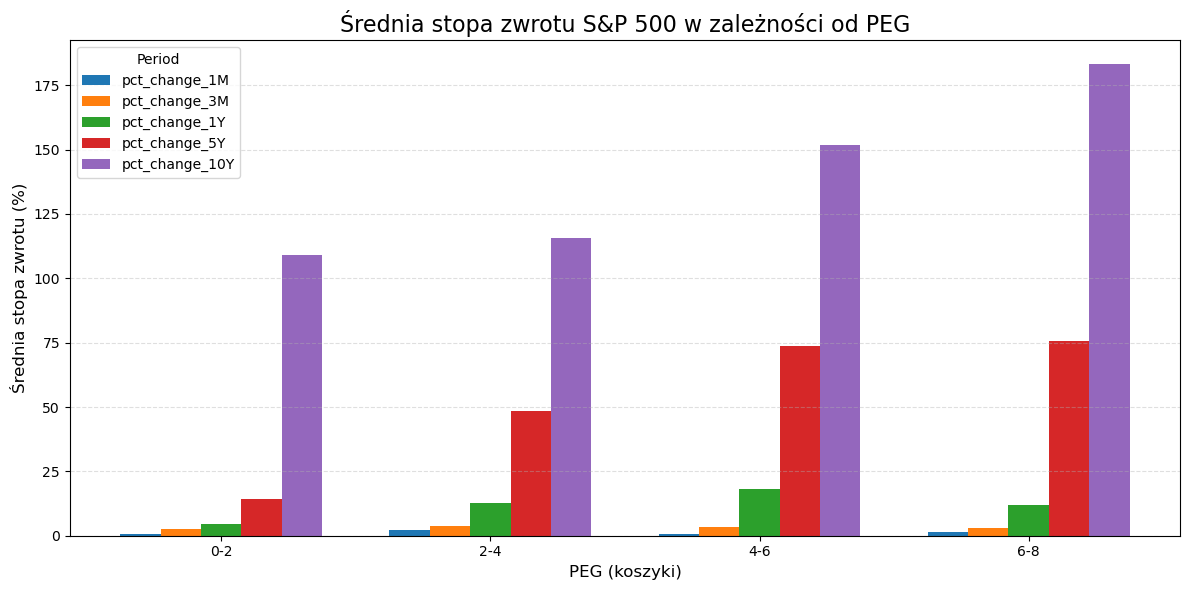

In [123]:
# Przygotowanie danych
pct_columns = ["pct_change_1M", "pct_change_3M", "pct_change_1Y", "pct_change_5Y", "pct_change_10Y"]
labels = mean_returns_by_bucket["PEG_bucket"]
x = np.arange(len(labels))  # pozycje na osi X
width = 0.15  # szerokość słupka

# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(12,6))

for i, col in enumerate(pct_columns):
    ax.bar(x + i*width, mean_returns_by_bucket[col], width, label=col)

# Ustawienia osi i tytuł
ax.set_xlabel("PEG (koszyki)", fontsize=12)
ax.set_ylabel("Średnia stopa zwrotu (%)", fontsize=12)
ax.set_title("Średnia stopa zwrotu S&P 500 w zależności od PEG", fontsize=16)
ax.set_xticks(x + width*2)  # wyśrodkowanie etykiet
ax.set_xticklabels(labels)
ax.legend(title="Period")
ax.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()